# Assignment 2: Clustering

### <span style='background :yellow' > Student Information </span>

**Name     : ALIA MARLIANA BINTI SHAIFUL BAHARI**

Problem: In this assignment, you are to work with the countries dataset (countries_geocodes.csv) 
containing three attributes described below. Given the longitude and latitude of each country, w 
want to group the countries into continents

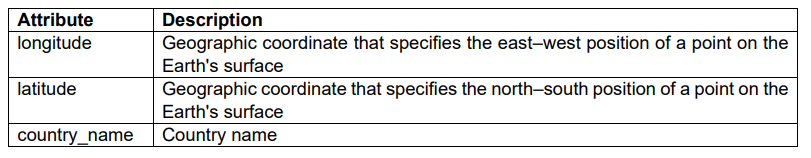


Your clusters should be formed based on only 2 attributes: <b>longitude</b> and <b>latitude</b>.. 

## Prepare and Explore Data

In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Read csv data file
x = pd.read_csv('countries_geocodes.csv')

x.head()

,latitude,longitude,country_name
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,-14.270972,-170.132217,American Samoa
4,42.506285,1.521801,Andorra


In [3]:
# View the number of instances and attributes
x.shape

(249, 3)

The countries geocodes dataset contains 249 instances and 3 attributes. We can also view a summary of the data.

In [4]:
# View a summary of the data
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      249 non-null    float64
 1   longitude     249 non-null    float64
 2   country_name  249 non-null    object 
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


Based on the info above, there is no null value in the dataset and the latitude and longitude are float data type.

In [5]:
# Create a subset of the data frame containing 2 attributes
x2 = x[['longitude', 'latitude']]

x2.head()

,longitude,latitude
0,67.709953,33.939110
1,20.168331,41.153332
2,1.659626,28.033886
3,-170.132217,-14.270972
4,1.521801,42.506285


## Part 1: K-Means Clustering (25 marks)

Use the K-Means cluster algorithm to find clusters representing continents. 

#### a) Experiment with some different sizes of k and observe the range of the Sum of Squares Error (SSE) (see Appendix for more details on SSE). 

What k value would you pick to best cluster the countries into continents? Briefly justify why you select the k value. 

C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=5, SSE=117.99829688902413
k=6, SSE=95.76850134251244
k=7, SSE=74.21807973905067
k=8, SSE=65.45726508800098
k=9, SSE=56.996257913831045


C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=10, SSE=51.94950584218408
k=11, SSE=47.308723977069434
k=12, SSE=43.7119023149437


C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=13, SSE=35.87653582489614
k=14, SSE=32.008086618933945


C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


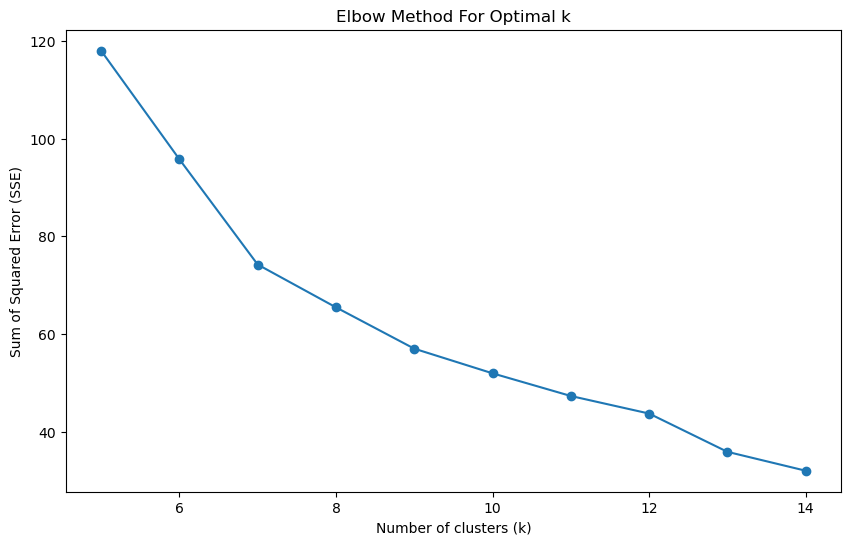

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(x2)

# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(5, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(coordinates_scaled)
    sse.append(kmeans.inertia_)
    print(f'k={k}, SSE={kmeans.inertia_}')

# Plot SSE for each k to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

#### b) Report the final parameters you set including the value of k selected to obtain your final clusters. 

Also, report the coordinates of the centroids, sum of squared differences to centroids and the number of iterations from the best clustering you have found. Explain in one sentence why you think this is your best clustering. 

In [18]:
# Import KMeans from scikit-learn
from sklearn.cluster import KMeans

from sklearn.model_selection import GridSearchCV

# Create KMeans object, random_state = 42 to make sure we get the same result everytime we run the code
kmeans = KMeans(n_clusters = 10, random_state = 42)

# Define the parameter grid
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': ['auto', 5, 10, 15, 20, 25, 30],  # Testing different numbers of initializations
    'max_iter': [100, 200, 300, 400, 500, 1000],  # Testing different maximum iterations
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['lloyd', 'elkan']
}

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(coordinates_scaled)

C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GridSearchCV(cv=5, estimator=KMeans(n_clusters=10, random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['lloyd', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500, 1000],
                         'n_init': ['auto', 5, 10, 15, 20, 25, 30],
                         'tol': [0.0001, 0.001, 0.01]})

In [19]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Fit the KMeans model with the best parameters
best_kmeans = grid_search.best_estimator_
best_kmeans.fit(coordinates_scaled)

# Print location of clusters learned by kmeans object
print("Coordinates of cluster centers: ", best_kmeans.cluster_centers_)
print("Label of each point: ", best_kmeans.labels_)
print("Number of iterations run: ", best_kmeans.n_iter_)
print("Sum of squared distances to centroids: ", best_kmeans.inertia_)

Best Parameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 100, 'n_init': 15, 'tol': 0.01}


C:\Users\amarl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Coordinates of cluster centers:  [[-0.03244955 -0.23048127]
 [ 0.58503031  0.66776496]
 [-1.12299367  0.01831014]
 [-0.04583135  1.22937116]
 [ 0.76822572 -2.83606508]
 [-0.96608938 -1.74634532]
 [ 1.84730159 -1.18921442]
 [ 0.29181688 -1.19403421]
 [-2.3656842  -1.19396761]
 [ 1.39492556 -0.01256263]]
Label of each point:  [1 3 0 8 3 7 2 4 2 5 1 2 6 3 1 2 1 9 2 3 3 2 0 2 1 5 3 7 4 5 7 2 9 3 0 7 9
 0 2 0 2 2 0 0 5 1 6 6 2 7 0 7 8 2 3 2 2 1 3 0 3 0 2 2 2 1 2 0 0 3 0 5 3 6
 3 3 2 8 4 0 0 2 3 0 3 3 3 2 2 9 2 3 0 0 2 2 4 2 9 3 3 9 9 1 1 3 3 1 3 2 9
 3 1 1 0 8 1 1 9 3 1 7 0 1 3 3 3 9 3 7 7 9 9 0 3 9 2 0 7 7 2 9 3 3 1 3 2 3
 7 9 7 6 1 3 6 6 2 0 0 8 6 9 9 3 1 1 9 1 2 6 5 5 9 8 3 3 2 1 3 1 0 7 8 3 1
 0 3 7 0 9 2 3 3 6 0 7 5 9 0 3 9 2 7 2 2 2 3 2 0 2 3 7 3 3 1 0 9 1 7 9 6 0
 8 8 2 3 1 1 2 6 9 2 3 2 0 3 1 5 1 6 3 2 9 8 0 0 7 7 3]
Number of iterations run:  4
Sum of squared distances to centroids:  46.24445719356835


#### c) Name the continent each cluster represents in the table below. 

Describe each cluster according to the centroid values of each attribute. For each cluster, be sure to report the attribute centroid in terms of the original attribute values. Also, you can visualize the clusters on a scatter plot to help you describe and identify the continent represented by each cluster. You can also concatenate the cluster labels with longitude, latitude and country names to analyze the countries in each cluster.

In [20]:
centroids = best_kmeans.cluster_centers_

# Inverse transform centroids to original scale
centroids_original = scaler.inverse_transform(centroids)

centroids_original

array([[  10.34941271,   10.01518105],
       [  56.58307703,   34.12160764],
       [ -71.30482996,   16.69204965],
       [   9.34745322,   49.19355364],
       [  70.2997912 ,  -59.91142987],
       [ -59.55665722,  -30.666387  ],
       [ 151.09535169,  -15.71454577],
       [  34.62878809,  -15.84389545],
       [-164.35100116,  -15.84210807],
       [ 117.22379954,   15.86351051]])

In [21]:
x['Cluster'] = best_kmeans.labels_
x

,latitude,longitude,country_name,Cluster
0,33.939110,67.709953,Afghanistan,1
1,41.153332,20.168331,Albania,3
2,28.033886,1.659626,Algeria,0
3,-14.270972,-170.132217,American Samoa,8
4,42.506285,1.521801,Andorra,3
...,...,...,...,...
244,24.215527,-12.885834,Western Sahara,0
245,15.552727,48.516388,Yemen,0
246,-13.133897,27.849332,Zambia,7
247,-19.015438,29.154857,Zimbabwe,7


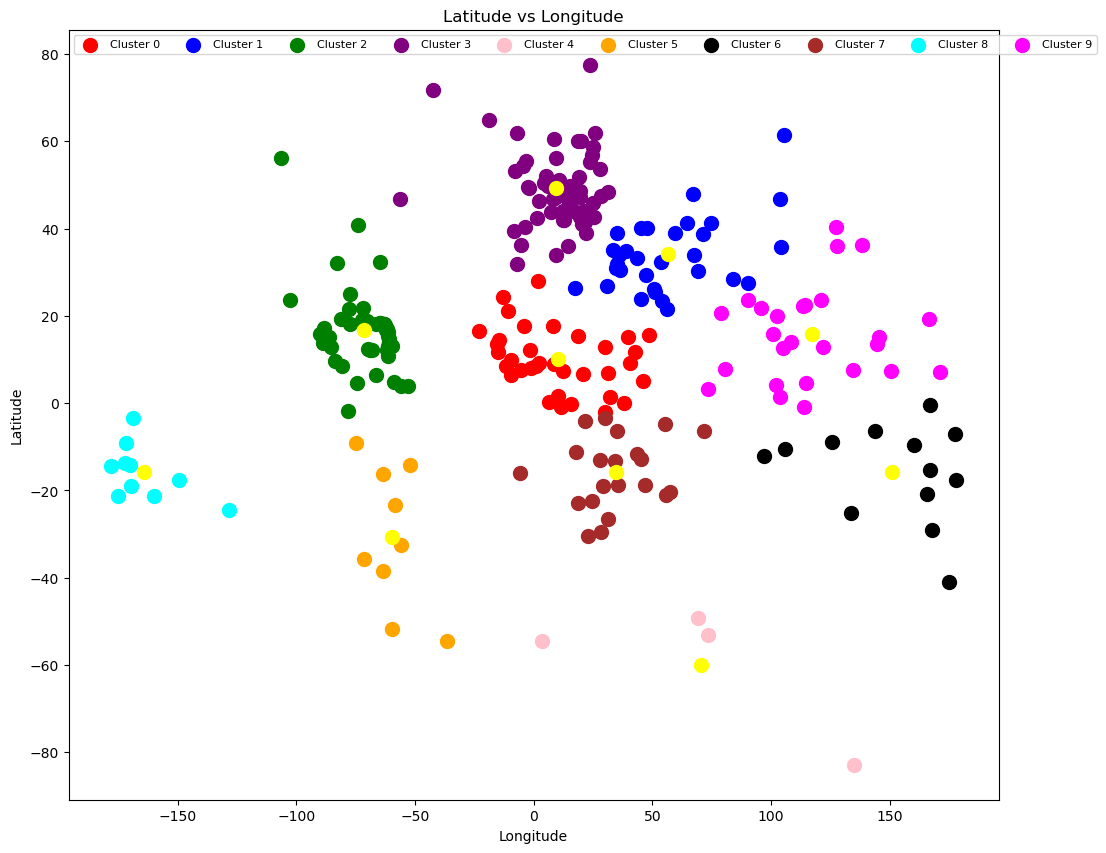

In [22]:
# Import pyplot for plotting
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x[x['Cluster'] == 0]['longitude'], x[x['Cluster'] == 0]['latitude'], s=100, c='red', label='Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x[x['Cluster'] == 1]['longitude'], x[x['Cluster'] == 1]['latitude'], s=100, c='blue', label='Cluster 1')

# Visualizing cluster 2
cluster2 = plt.scatter(x[x['Cluster'] == 2]['longitude'], x[x['Cluster'] == 2]['latitude'], s=100, c='green', label='Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x[x['Cluster'] == 3]['longitude'], x[x['Cluster'] == 3]['latitude'], s=100, c='purple', label='Cluster 3')

# Visualising cluster 4
cluster4 = plt.scatter(x[x['Cluster'] == 4]['longitude'], x[x['Cluster'] == 4]['latitude'], s=100, c='pink', label='Cluster 4')

# Visualizing cluster 5
cluster5 = plt.scatter(x[x['Cluster'] == 5]['longitude'], x[x['Cluster'] == 5]['latitude'], s=100, c='orange', label='Cluster 5')

# Visualizing cluster 6
cluster6 = plt.scatter(x[x['Cluster'] == 6]['longitude'], x[x['Cluster'] == 6]['latitude'], s=100, c='black', label='Cluster 6')

# Visualizing cluster 7
cluster7 = plt.scatter(x[x['Cluster'] == 7]['longitude'], x[x['Cluster'] == 7]['latitude'], s=100, c='brown', label='Cluster 7')

# Visualizing cluster 8
cluster8 = plt.scatter(x[x['Cluster'] == 8]['longitude'], x[x['Cluster'] == 8]['latitude'], s=100, c='cyan', label='Cluster 8')

# Visualizing cluster 9
cluster9 = plt.scatter(x[x['Cluster'] == 9]['longitude'], x[x['Cluster'] == 9]['latitude'], s=100, c='magenta', label='Cluster 9')

# Plot the centroids
# We are going to use the attribute that returns the coordinates of the centroids
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s = 100, \
            c = 'yellow', label = 'Centroids')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 10,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis 
plt.ylabel('Latitude')

# Show plot
plt.show()

In [23]:
# Select rows where Cluster == 0 and choose columns 'country_name' and 'Cluster' --> Europe
filtered_data = x[x['Cluster'] == 0][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Algeria'], ['Benin'], ['Burkina Faso'], ['Cameroon'], ['Cape Verde'], ['Central African Republic'], ['Chad'], ['Congo - Brazzaville'], ['Cote dIvoire'], ['Djibouti'], ['Equatorial Guinea'], ['Eritrea'], ['Ethiopia'], ['Gabon'], ['Gambia'], ['Ghana'], ['Guinea'], ['Guinea-Bissau'], ['Kenya'], ['Liberia'], ['Mali'], ['Mauritania'], ['Niger'], ['Nigeria'], ['Rwanda'], ['Senegal'], ['Sierra Leone'], ['Somalia'], ['South Sudan'], ['Sudan'], ['Sao Tome & Principe'], ['Togo'], ['Uganda'], ['Western Sahara'], ['Yemen']]


In [13]:
# Select rows where Cluster == 1 and choose columns 'country_name' and 'Cluster' --> Asia
filtered_data = x[x['Cluster'] == 1][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Afghanistan'], ['Armenia'], ['Azerbaijan'], ['Bahrain'], ['Bhutan'], ['China'], ['Cyprus'], ['Egypt'], ['Iran'], ['Iraq'], ['Israel'], ['Jordan'], ['Kazakhstan'], ['Kuwait'], ['Kyrgyzstan'], ['Lebanon'], ['Libya'], ['Mongolia'], ['Nepal'], ['Oman'], ['Pakistan'], ['Palestine'], ['Qatar'], ['Russia'], ['Saudi Arabia'], ['Syria'], ['Tajikistan'], ['Turkey'], ['Turkmenistan'], ['United Arab Emirates'], ['Uzbekistan']]


In [14]:
# Select rows where Cluster == 2 and choose columns 'country_name' and 'Cluster' --> North America
filtered_data = x[x['Cluster'] == 2][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Anguilla'], ['Antigua & Barbuda'], ['Aruba'], ['Bahamas'], ['Barbados'], ['Belize'], ['Bermuda'], ['British Virgin Islands'], ['Canada'], ['Caribbean Netherlands'], ['Cayman Islands'], ['Colombia'], ['Costa Rica'], ['Cuba'], ['Curacao'], ['Dominica'], ['Dominican Republic'], ['Ecuador'], ['El Salvador'], ['French Guiana'], ['Georgia'], ['Grenada'], ['Guadeloupe'], ['Guatemala'], ['Guyana'], ['Haiti'], ['Honduras'], ['Jamaica'], ['Martinique'], ['Mexico'], ['Montserrat'], ['Nicaragua'], ['Panama'], ['Puerto Rico'], ['Sint Maarten'], ['St. Barthelemy'], ['St. Kitts & Nevis'], ['St. Lucia'], ['St. Martin'], ['St. Vincent & Grenadines'], ['Suriname'], ['Trinidad & Tobago'], ['Turks & Caicos Islands'], ['U.S. Virgin Islands'], ['US'], ['Venezuela']]


In [15]:
# Select rows where Cluster == 3 and choose columns 'country_name' and 'Cluster' --> Europe
filtered_data = x[x['Cluster'] == 3][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Albania'], ['Andorra'], ['Austria'], ['Belarus'], ['Belgium'], ['Bosnia'], ['Bulgaria'], ['Croatia'], ['Czech Republic'], ['Denmark'], ['Estonia'], ['Faroe Islands'], ['Finland'], ['France'], ['Germany'], ['Gibraltar'], ['Greece'], ['Greenland'], ['Guernsey'], ['Hungary'], ['Iceland'], ['Ireland'], ['Isle of Man'], ['Italy'], ['Jersey'], ['Latvia'], ['Liechtenstein'], ['Lithuania'], ['Luxembourg'], ['Macedonia'], ['Malta'], ['Moldova'], ['Monaco'], ['Montenegro'], ['Morocco'], ['Netherlands'], ['Norway'], ['Poland'], ['Portugal'], ['Romania'], ['San Marino'], ['Serbia'], ['Slovakia'], ['Slovenia'], ['Spain'], ['St. Pierre & Miquelon'], ['Svalbard & Jan Mayen'], ['Sweden'], ['Switzerland'], ['Tunisia'], ['UK'], ['Ukraine'], ['Vatican City'], ['Aland Islands']]


In [16]:
# Select rows where Cluster == 4 and choose columns 'country_name' and 'Cluster' --> Antarctica
filtered_data = x[x['Cluster'] == 4][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Antarctica'], ['Bouvet Island'], ['French Southern Territories'], ['Heard & McDonald Islands']]


In [17]:
# Select rows where Cluster == 5 and choose columns 'country_name' and 'Cluster' --> South America
filtered_data = x[x['Cluster'] == 5][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Argentina'], ['Bolivia'], ['Brazil'], ['Chile'], ['Falkland Islands'], ['Paraguay'], ['Peru'], ['South Georgia & South Sandwich Islands'], ['Uruguay']]


In [18]:
# Select rows where Cluster == 6 and choose columns 'country_name' and 'Cluster' --> Oceania
filtered_data = x[x['Cluster'] == 6][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Australia'], ['Christmas Island'], ['Cocos (Keeling) Islands'], ['Fiji'], ['Nauru'], ['New Caledonia'], ['New Zealand'], ['Norfolk Island'], ['Papua New Guinea'], ['Solomon Islands'], ['Timor-Leste'], ['Tuvalu'], ['Vanuatu']]


In [19]:
# Select rows where Cluster == 7 and choose columns 'country_name' and 'Cluster' --> Africa
filtered_data = x[x['Cluster'] == 7][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Angola'], ['Botswana'], ['British Indian Ocean Territory'], ['Burundi'], ['Comoros'], ['Congo - Kinshasa'], ['Lesotho'], ['Madagascar'], ['Malawi'], ['Mauritius'], ['Mayotte'], ['Mozambique'], ['Namibia'], ['Reunion'], ['Seychelles'], ['South Africa'], ['St. Helena'], ['Swaziland'], ['Tanzania'], ['Zambia'], ['Zimbabwe']]


In [20]:
# Select rows where Cluster == 8 and choose columns 'country_name' and 'Cluster' --> Oceania
filtered_data = x[x['Cluster'] == 8][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['American Samoa'], ['Cook Islands'], ['French Polynesia'], ['Kiribati'], ['Niue'], ['Pitcairn Islands'], ['Samoa'], ['Tokelau'], ['Tonga'], ['Wallis & Futuna']]


In [21]:
# Select rows where Cluster == 9 and choose columns 'country_name' and 'Cluster' --> Asia
filtered_data = x[x['Cluster'] == 9][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Bangladesh'], ['Brunei'], ['Cambodia'], ['Guam'], ['Hong Kong'], ['India'], ['Indonesia'], ['Japan'], ['Laos'], ['Macau'], ['Malaysia'], ['Maldives'], ['Marshall Islands'], ['Micronesia'], ['Myanmar'], ['North Korea'], ['Northern Mariana Islands'], ['Palau'], ['Philippines'], ['Singapore'], ['South Korea'], ['Sri Lanka'], ['Taiwan'], ['Thailand'], ['U.S. Outlying Islands'], ['Vietnam']]


## Part 2: Hierarchical Clustering (25 marks)

Use the hierarchical clustering algorithm to find clusters representing continents. 

### a) Use the AgglomerativeClustering algorithm. 

Experiment with different number of clusters (n_clusters) and other parameters (e.g., affinity, linkage, etc.) to get the best clusters to represent continents. Use dendrogram and scatter plot to help you visualize the clusters. Report the best parameters, the number of clusters you have selected. Explain in one sentence why you think this is your best clustering. 

In [22]:
# Read csv data file
x = pd.read_csv('countries_geocodes.csv')

x.head()

,latitude,longitude,country_name
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,-14.270972,-170.132217,American Samoa
4,42.506285,1.521801,Andorra


In [23]:
# Create a subset of the data frame containing 2 attributes
x2 = x[['longitude', 'latitude']]

x2.head()

,longitude,latitude
0,67.709953,33.939110
1,20.168331,41.153332
2,1.659626,28.033886
3,-170.132217,-14.270972
4,1.521801,42.506285


In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#### Number of Clusters = 5

In [25]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [0 0 0 1 0 0 1 2 1 3 0 1 2 0 0 1 0 0 1 0 0 1 0 1 0 3 0 0 3 3 0 1 4 0 0 0 4
 0 1 0 1 1 0 0 3 4 4 4 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 3 0 2
 0 0 1 1 2 0 0 1 0 0 0 0 0 1 1 2 1 0 0 0 1 1 2 1 4 0 0 0 4 0 0 0 0 0 0 1 4
 0 0 0 0 1 0 0 4 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 2 1 0 0 0 1 2 0 0 4 0 1 0
 0 4 0 2 0 0 2 2 1 0 0 1 2 4 2 0 0 0 2 0 1 2 3 1 4 1 0 0 1 0 0 4 0 0 1 0 0
 0 0 0 0 4 1 0 0 2 0 0 3 4 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 4 0 0 4 2 0
 1 1 1 0 0 0 1 2 2 1 0 1 0 0 0 3 0 2 0 1 4 1 0 0 0 0 0]


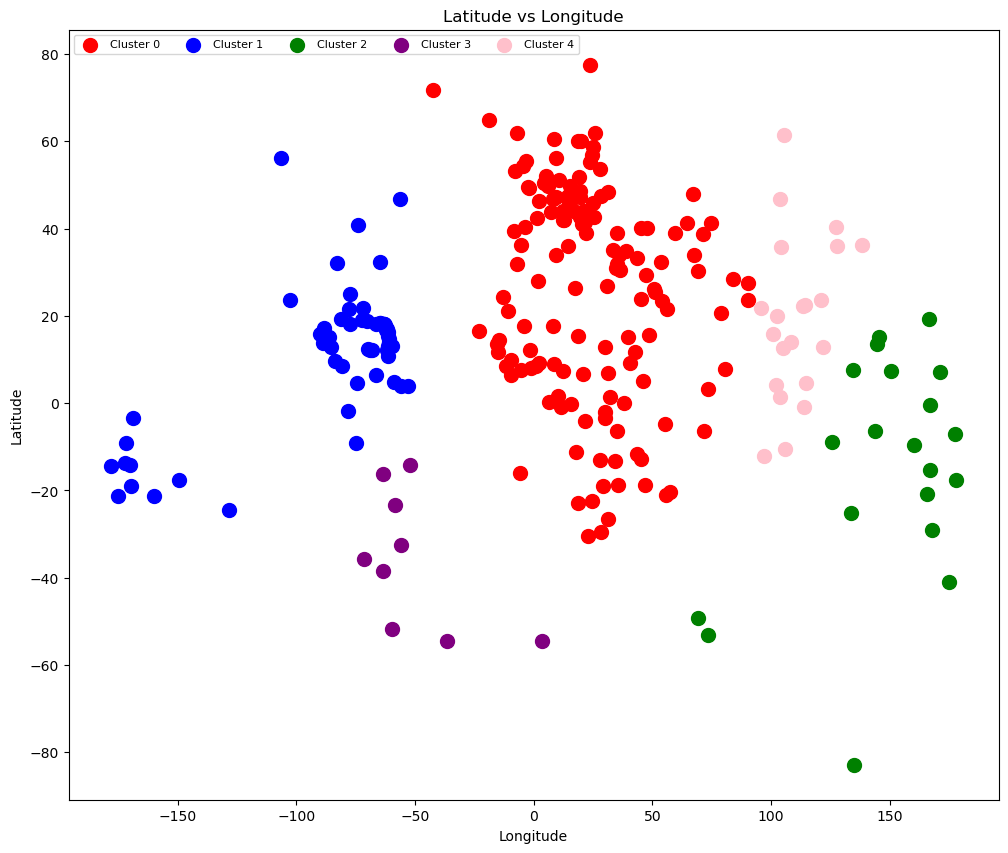

In [26]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 5,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

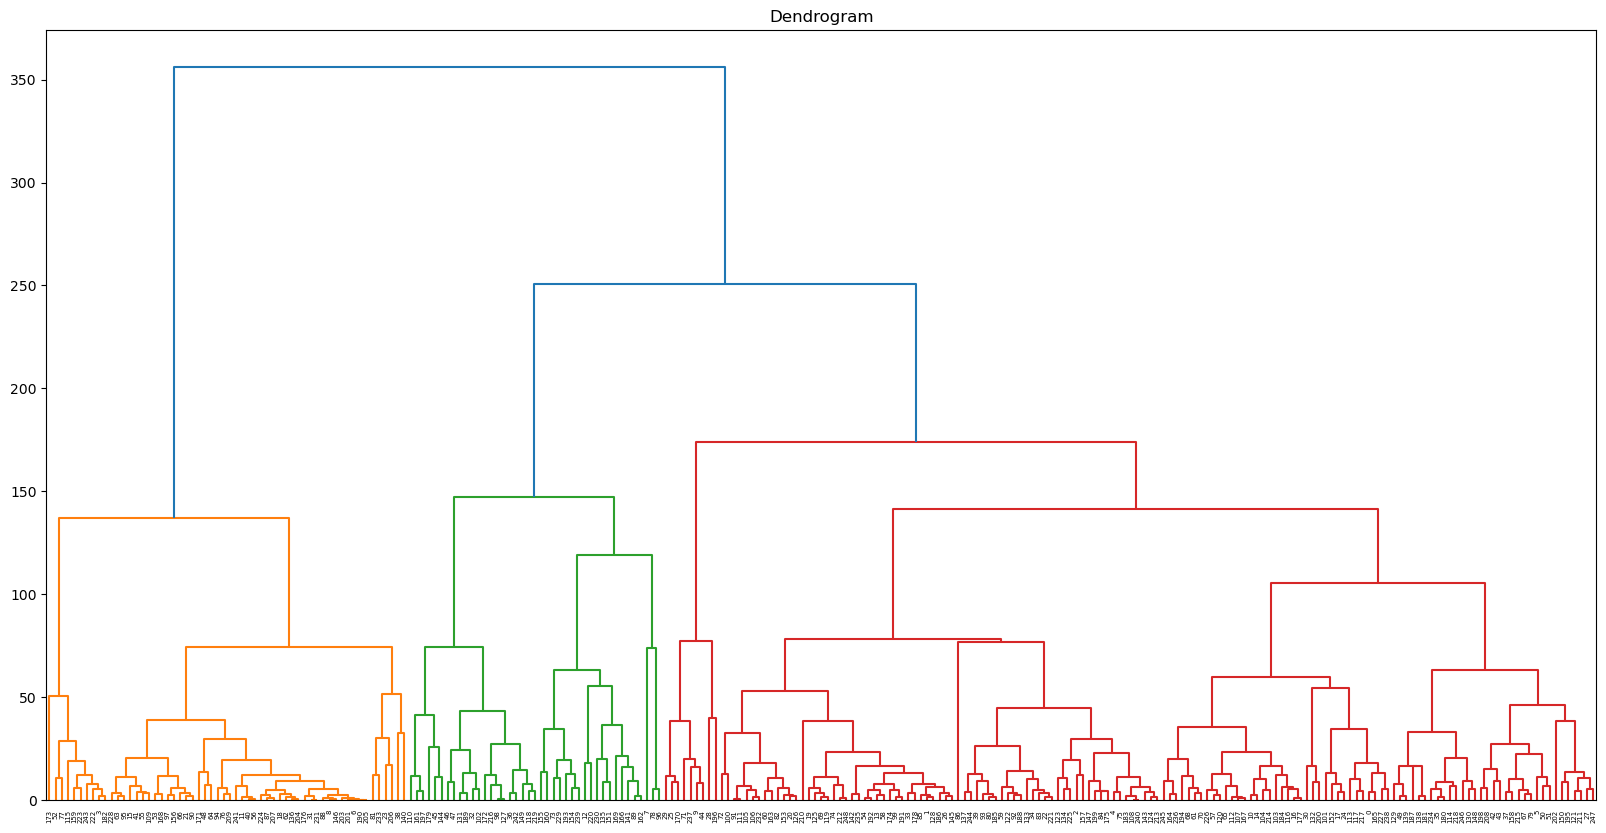

In [27]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'complete'))

# Show plot
plt.show()

#### Number of Clusters = 6

In [28]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [1 5 5 0 5 1 0 2 0 3 1 0 2 5 1 0 1 1 0 5 5 0 5 0 1 3 5 1 3 3 1 0 4 5 5 1 4
 1 0 5 0 0 1 1 3 4 4 4 0 1 1 1 0 0 5 0 0 1 5 5 5 1 0 0 0 1 0 1 1 5 1 3 5 2
 5 5 0 0 2 1 5 0 5 5 5 5 5 0 0 2 0 5 5 5 0 0 2 0 4 5 5 1 4 1 1 5 5 1 5 0 4
 5 1 1 1 0 1 1 4 5 1 1 5 5 5 5 5 4 5 1 1 4 1 5 5 2 0 5 1 1 0 2 5 5 4 5 0 5
 1 4 1 2 1 5 2 2 0 5 1 0 2 4 2 5 1 1 2 1 0 2 3 0 4 0 5 5 0 1 5 4 1 1 0 5 1
 5 5 1 5 4 0 5 5 2 1 1 3 4 1 5 1 0 1 0 0 0 0 0 1 0 5 1 5 5 1 1 4 1 1 4 2 5
 0 0 0 5 1 1 0 2 2 0 5 0 1 5 1 3 1 2 5 0 4 0 5 1 1 1 5]


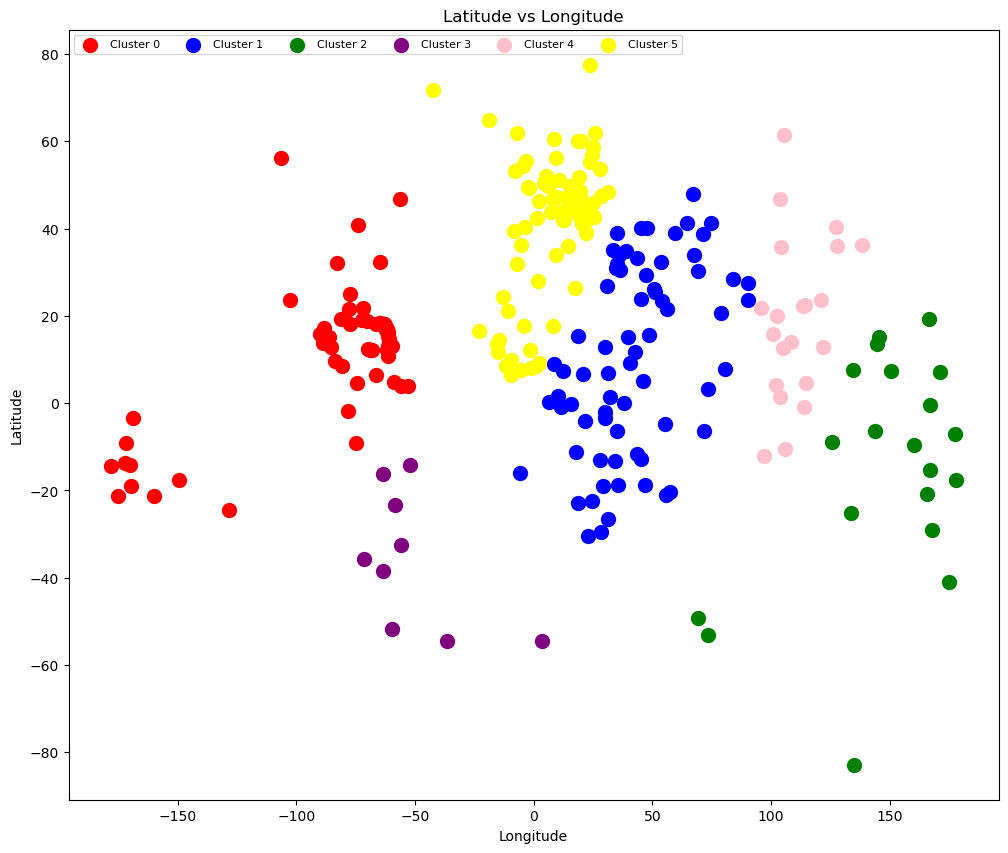

In [29]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 6,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

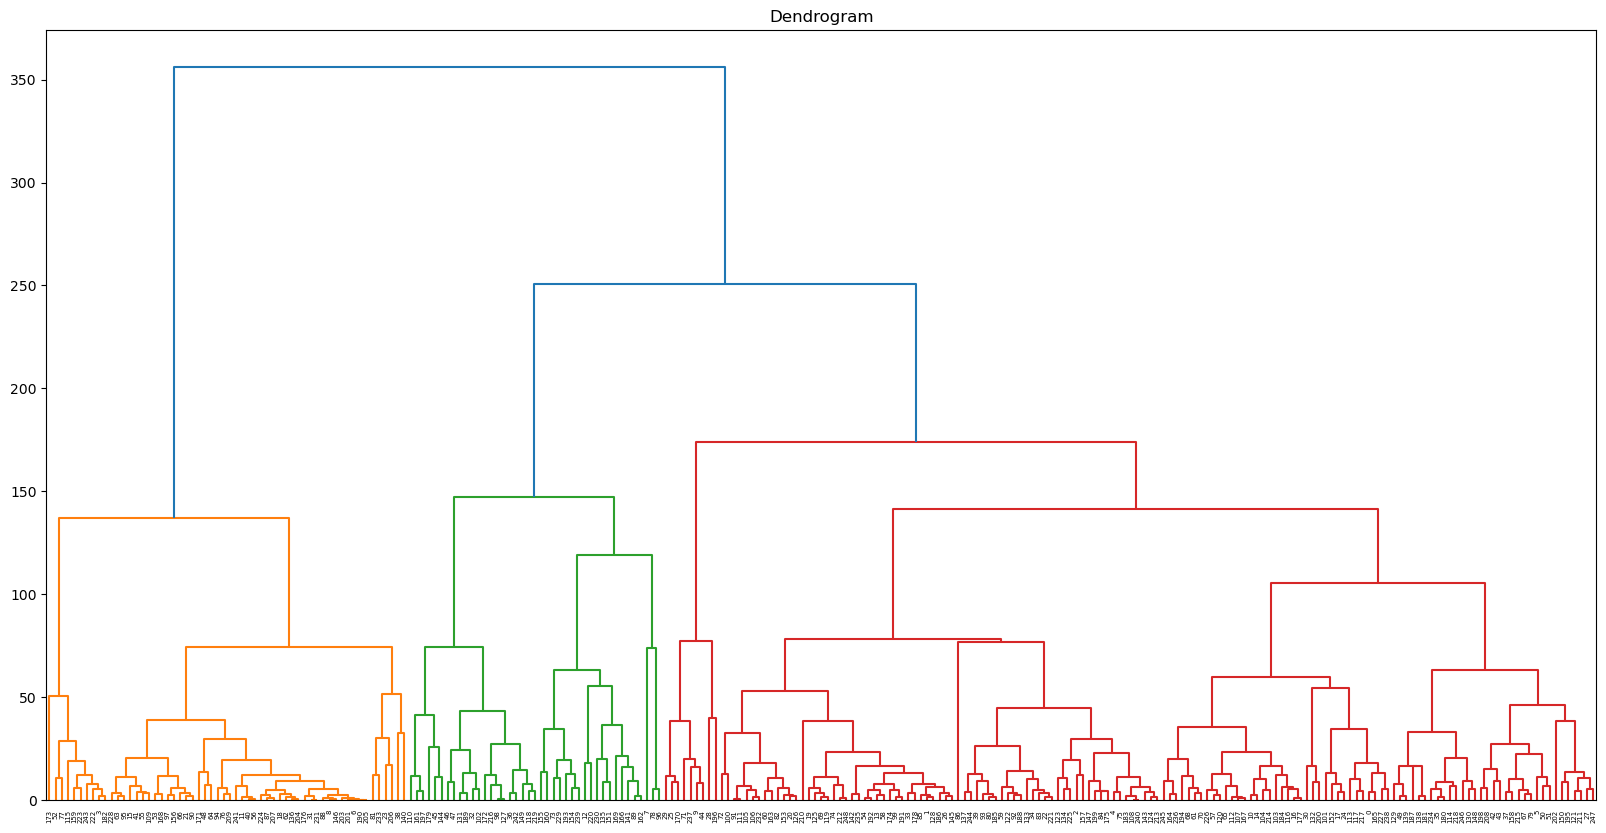

In [30]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'complete'))

# Show plot
plt.show()

#### Number of Clusters = 7

In [31]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 7, linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [1 2 2 6 2 1 5 0 5 3 1 5 0 2 1 5 1 1 5 2 2 5 2 5 1 3 2 1 3 3 1 5 4 2 2 1 4
 1 5 2 5 5 1 1 3 4 4 4 5 1 1 1 6 5 2 5 5 1 2 2 2 1 5 5 5 1 5 1 1 2 1 3 2 0
 2 2 5 6 0 1 2 5 2 2 2 2 2 5 5 0 5 2 2 2 5 5 0 5 4 2 2 1 4 1 1 2 2 1 2 5 4
 2 1 1 1 6 1 1 4 2 1 1 2 2 2 2 2 4 2 1 1 4 1 2 2 0 5 2 1 1 5 0 2 2 4 2 5 2
 1 4 1 0 1 2 0 0 5 2 1 6 0 4 0 2 1 1 0 1 5 0 3 5 4 6 2 2 5 1 2 4 1 1 6 2 1
 2 2 1 2 4 5 2 2 0 1 1 3 4 1 2 1 5 1 5 5 5 5 5 1 5 2 1 2 2 1 1 4 1 1 4 0 2
 6 6 5 2 1 1 5 0 0 5 2 5 1 2 1 3 1 0 2 5 4 6 2 1 1 1 2]


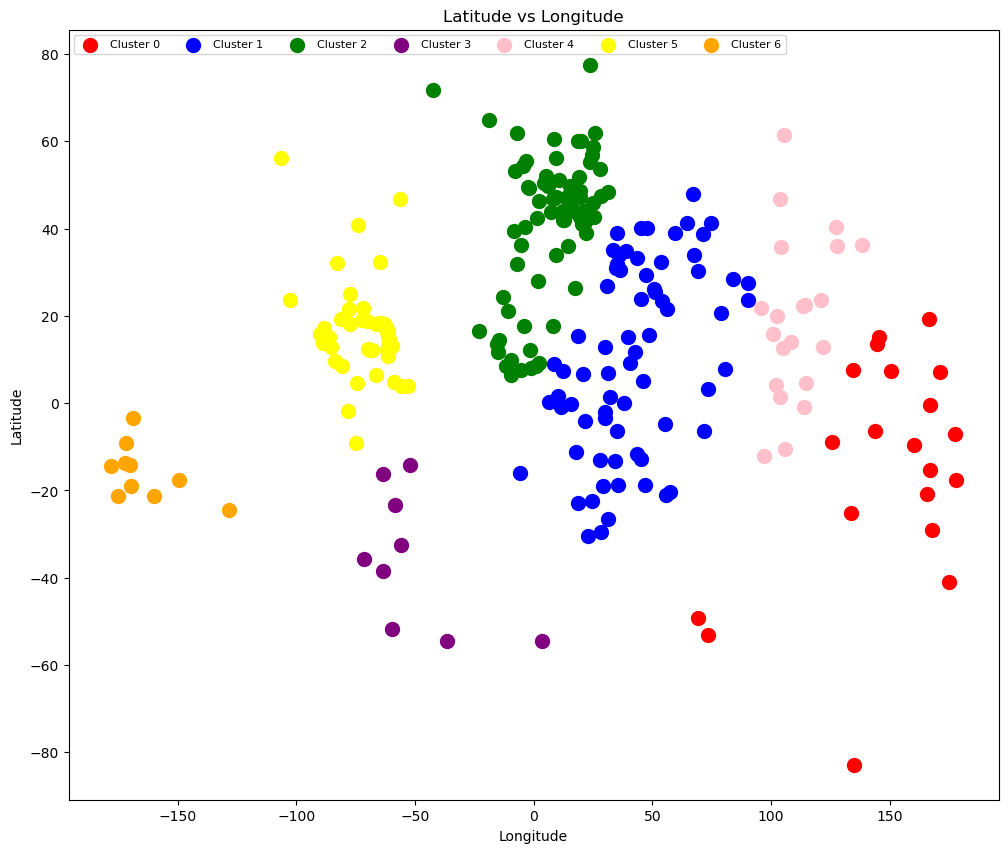

In [32]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 7,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

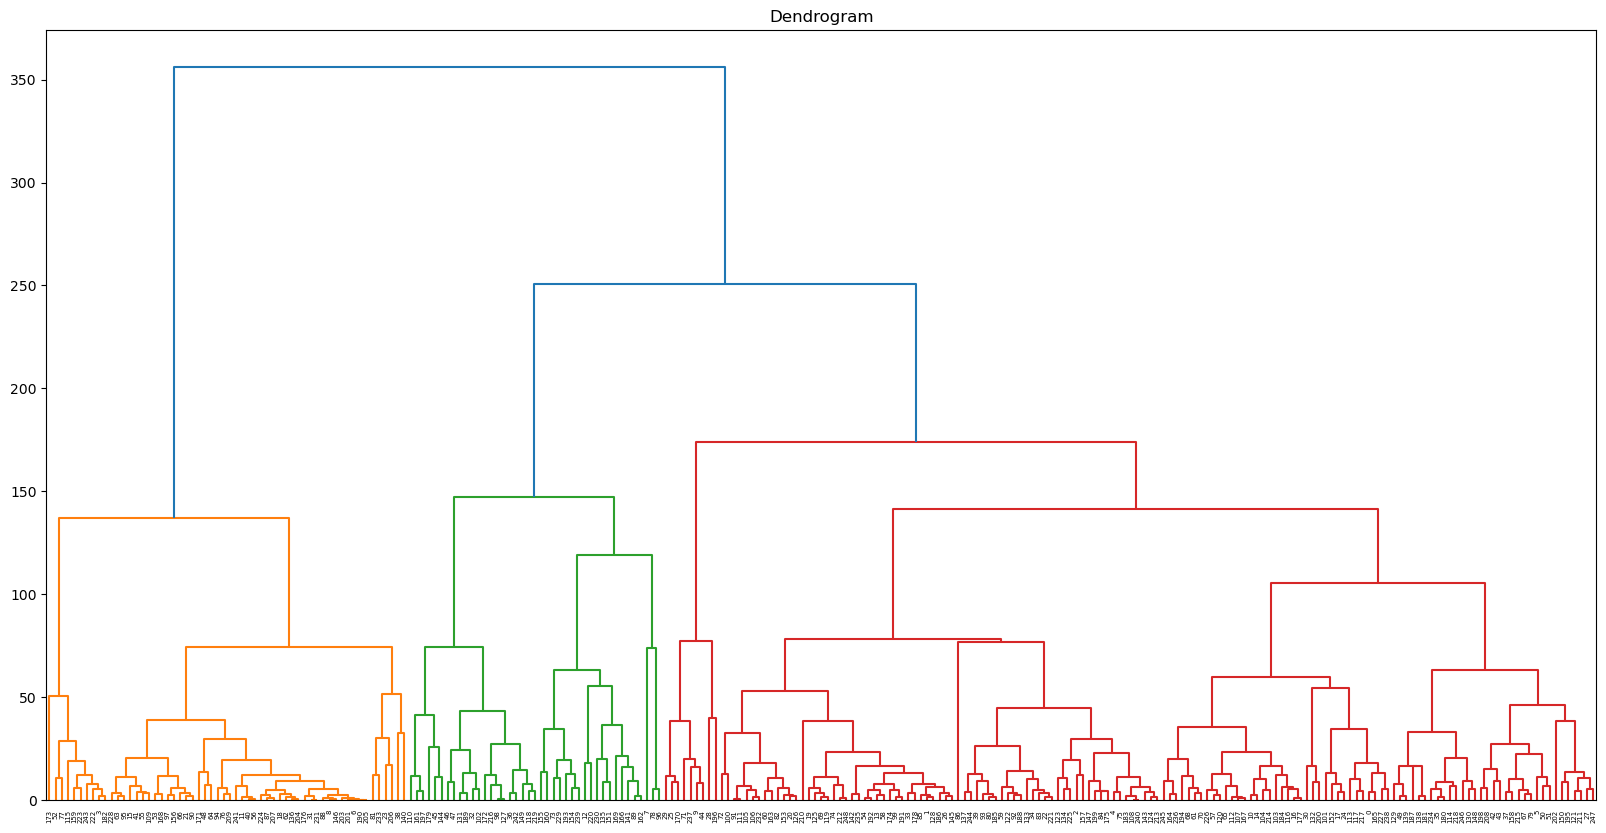

In [33]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'complete'))

# Show plot
plt.show()

#### Number of Clusters = 8

In [34]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 8, linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [0 2 2 6 2 0 5 3 5 1 0 5 7 2 0 5 0 0 5 2 2 5 2 5 0 1 2 0 1 1 0 5 4 2 2 0 4
 0 5 2 5 5 0 0 1 4 4 4 5 0 0 0 6 5 2 5 5 0 2 2 2 0 5 5 5 0 5 0 0 2 0 1 2 7
 2 2 5 6 3 0 2 5 2 2 2 2 2 5 5 7 5 2 2 2 5 5 3 5 4 2 2 0 4 0 0 2 2 0 2 5 4
 2 0 0 0 6 0 0 4 2 0 0 2 2 2 2 2 4 2 0 0 4 0 2 2 7 5 2 0 0 5 7 2 2 4 2 5 2
 0 4 0 7 0 2 7 7 5 2 0 6 7 4 7 2 0 0 7 0 5 7 1 5 4 6 2 2 5 0 2 4 0 0 6 2 0
 2 2 0 2 4 5 2 2 7 0 0 1 4 0 2 0 5 0 5 5 5 5 5 0 5 2 0 2 2 0 0 4 0 0 4 7 2
 6 6 5 2 0 0 5 7 7 5 2 5 0 2 0 1 0 7 2 5 4 6 2 0 0 0 2]


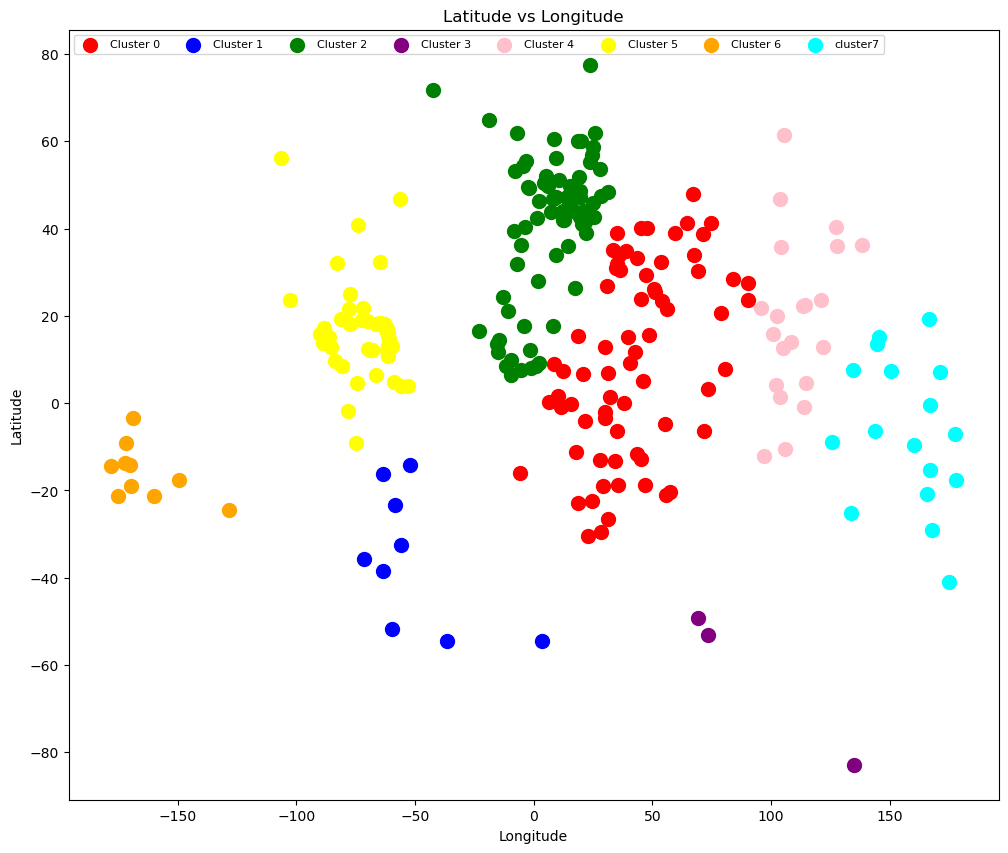

In [35]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'cyan', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'cluster7'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 8,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

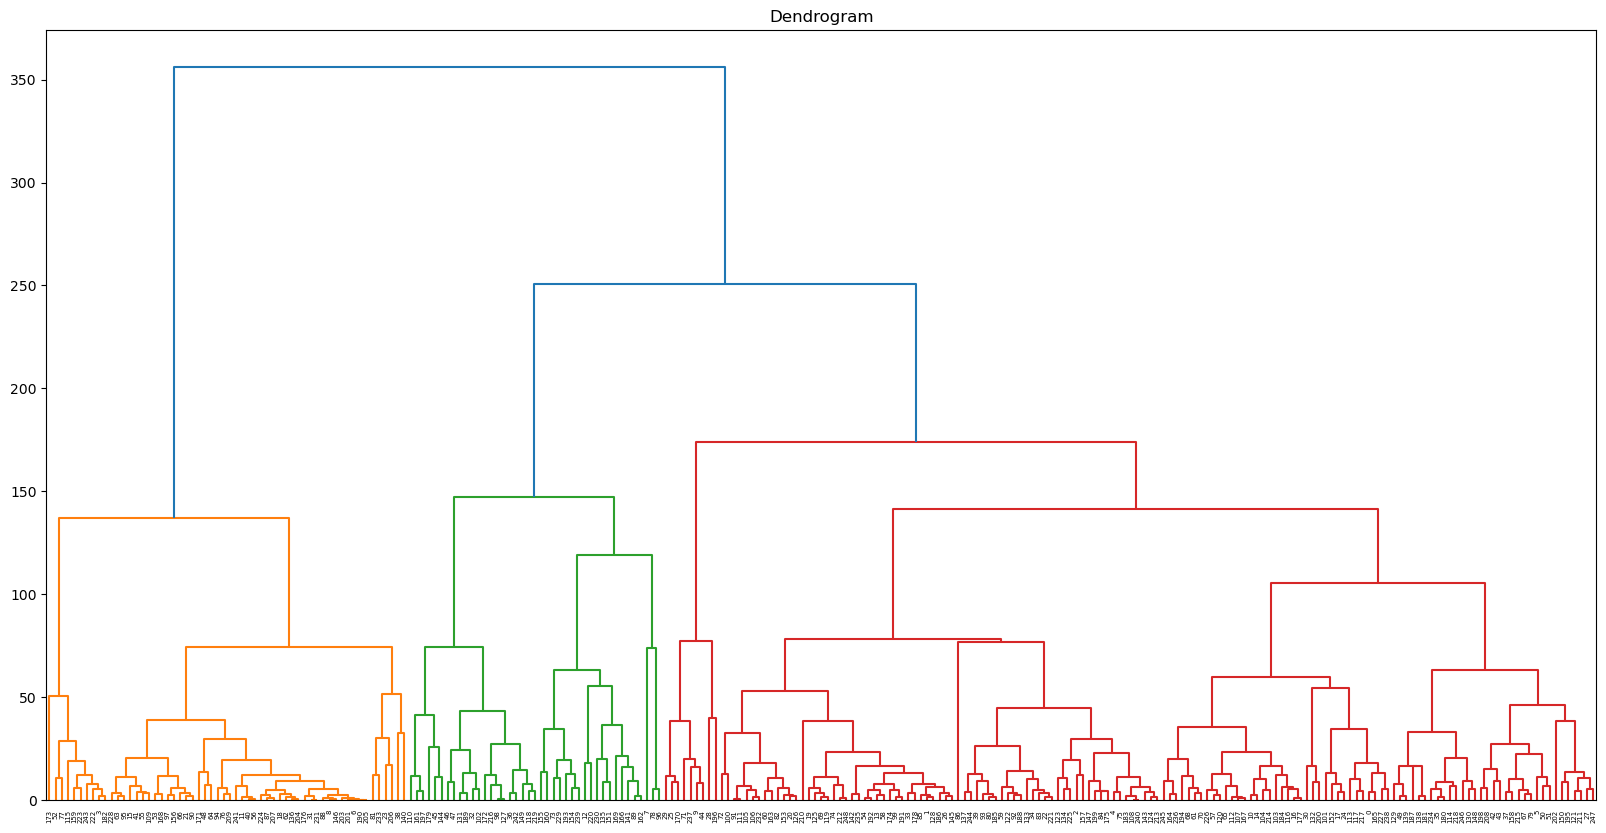

In [36]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'complete'))

# Show plot
plt.show()

#### Number of Clusters = 9

In [37]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [8 0 0 6 0 5 2 3 2 1 8 2 7 0 8 2 8 8 2 0 0 2 0 2 8 1 0 5 1 1 8 2 4 0 0 5 4
 5 2 0 2 2 5 5 1 4 4 4 2 5 5 5 6 2 0 2 2 8 0 0 0 8 2 2 2 8 2 5 8 0 8 1 0 7
 0 0 2 6 3 5 0 2 0 0 0 0 0 2 2 7 2 0 0 0 2 2 3 2 4 0 0 8 4 8 8 0 0 8 0 2 4
 0 8 8 5 6 8 8 4 0 8 5 0 0 0 0 0 4 0 5 5 4 8 0 0 7 2 0 5 5 2 7 0 0 4 0 2 0
 5 4 5 7 8 0 7 7 2 0 5 6 7 4 7 0 8 8 7 8 2 7 1 2 4 6 0 0 2 8 0 4 5 5 6 0 8
 0 0 5 0 4 2 0 0 7 8 5 1 4 5 0 8 2 5 2 2 2 2 2 5 2 0 5 0 0 8 5 4 8 5 4 7 0
 6 6 2 0 8 8 2 7 7 2 0 2 5 0 8 1 8 7 0 2 4 6 0 8 5 5 0]


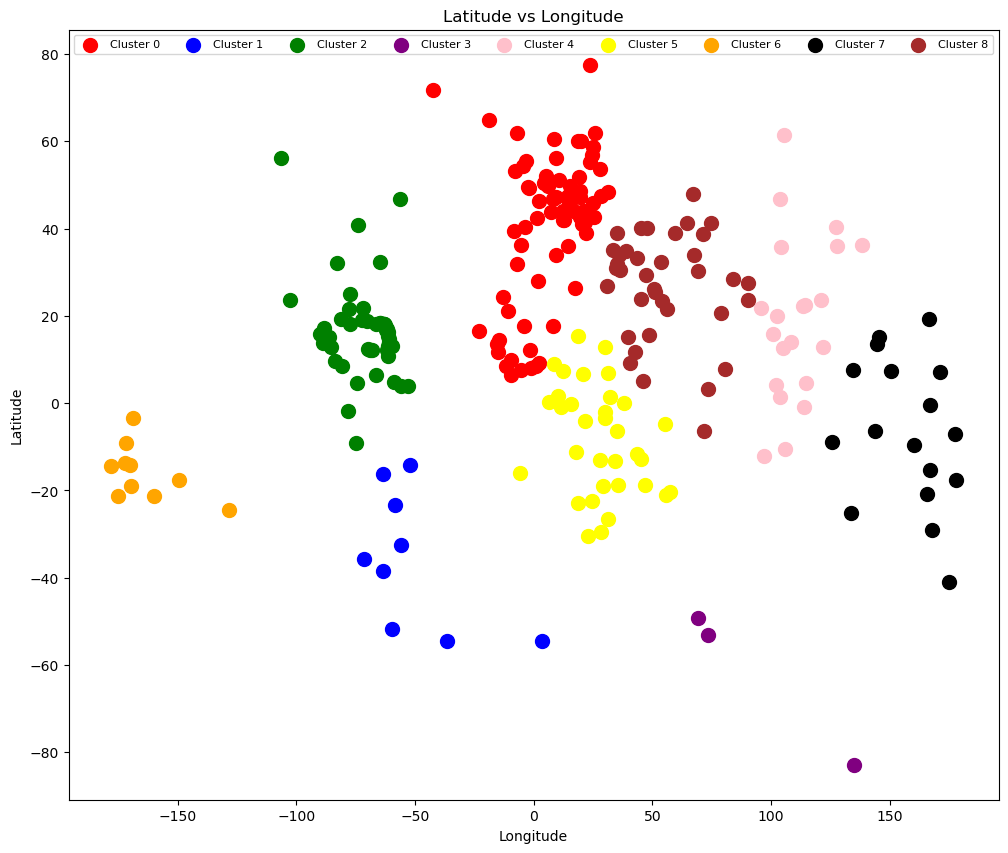

In [38]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'black', label = 'Cluster 7')

# Visualing cluster 8
cluster8 = plt.scatter(x2.iloc[y_hc == 8, 0], x2.iloc[y_hc == 8, 1], s = 100, \
                       c = 'brown', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 9,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

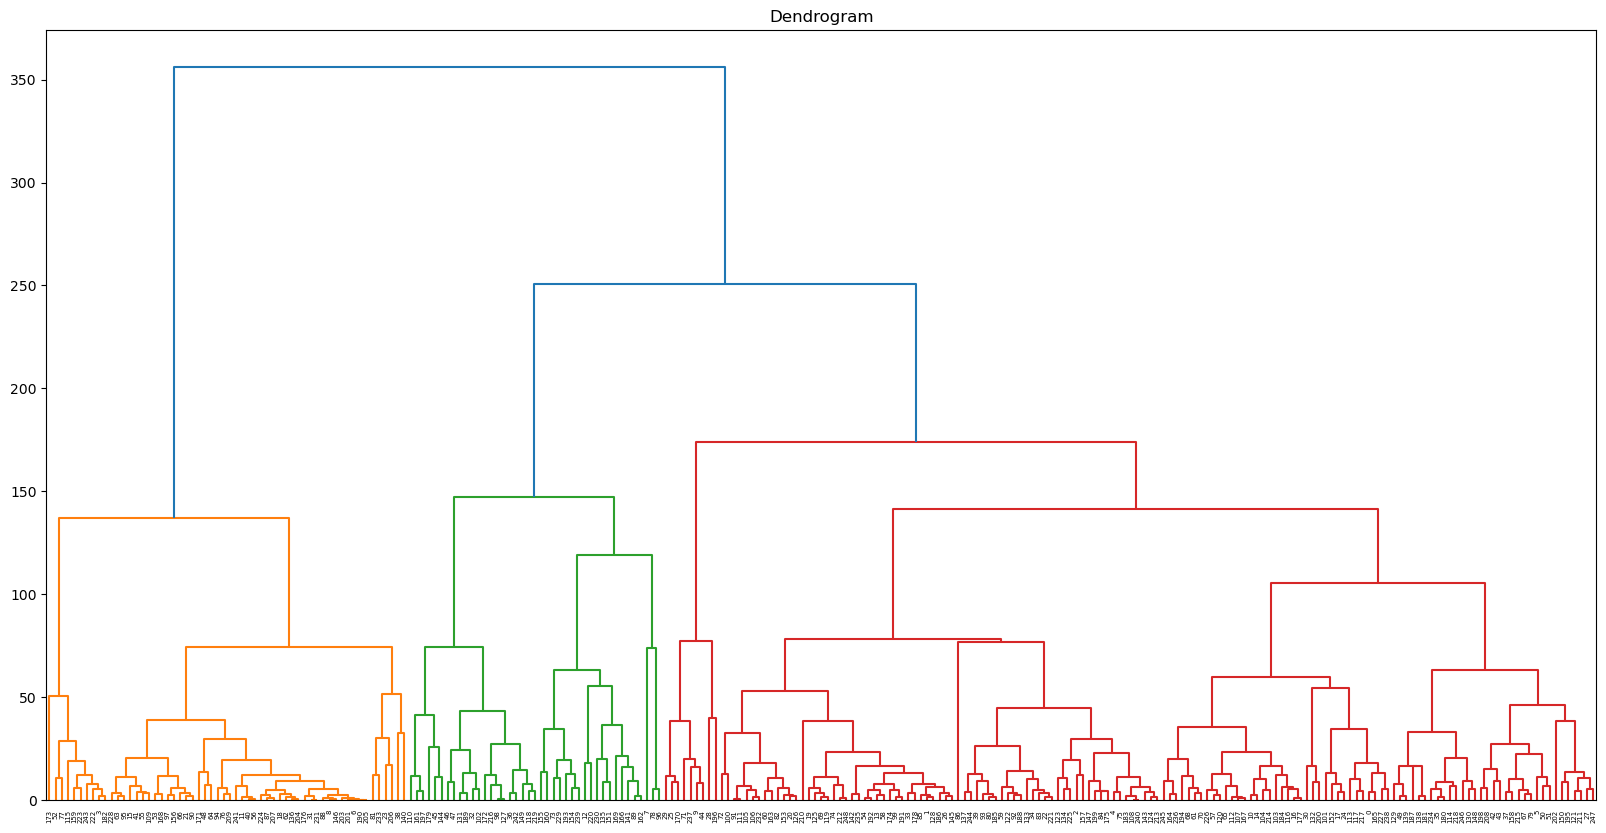

In [39]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'complete'))

# Show plot
plt.show()

#### Metrics = Euclidean

In [40]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, metric = 'euclidean', linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [8 0 0 6 0 5 2 3 2 1 8 2 7 0 8 2 8 8 2 0 0 2 0 2 8 1 0 5 1 1 8 2 4 0 0 5 4
 5 2 0 2 2 5 5 1 4 4 4 2 5 5 5 6 2 0 2 2 8 0 0 0 8 2 2 2 8 2 5 8 0 8 1 0 7
 0 0 2 6 3 5 0 2 0 0 0 0 0 2 2 7 2 0 0 0 2 2 3 2 4 0 0 8 4 8 8 0 0 8 0 2 4
 0 8 8 5 6 8 8 4 0 8 5 0 0 0 0 0 4 0 5 5 4 8 0 0 7 2 0 5 5 2 7 0 0 4 0 2 0
 5 4 5 7 8 0 7 7 2 0 5 6 7 4 7 0 8 8 7 8 2 7 1 2 4 6 0 0 2 8 0 4 5 5 6 0 8
 0 0 5 0 4 2 0 0 7 8 5 1 4 5 0 8 2 5 2 2 2 2 2 5 2 0 5 0 0 8 5 4 8 5 4 7 0
 6 6 2 0 8 8 2 7 7 2 0 2 5 0 8 1 8 7 0 2 4 6 0 8 5 5 0]


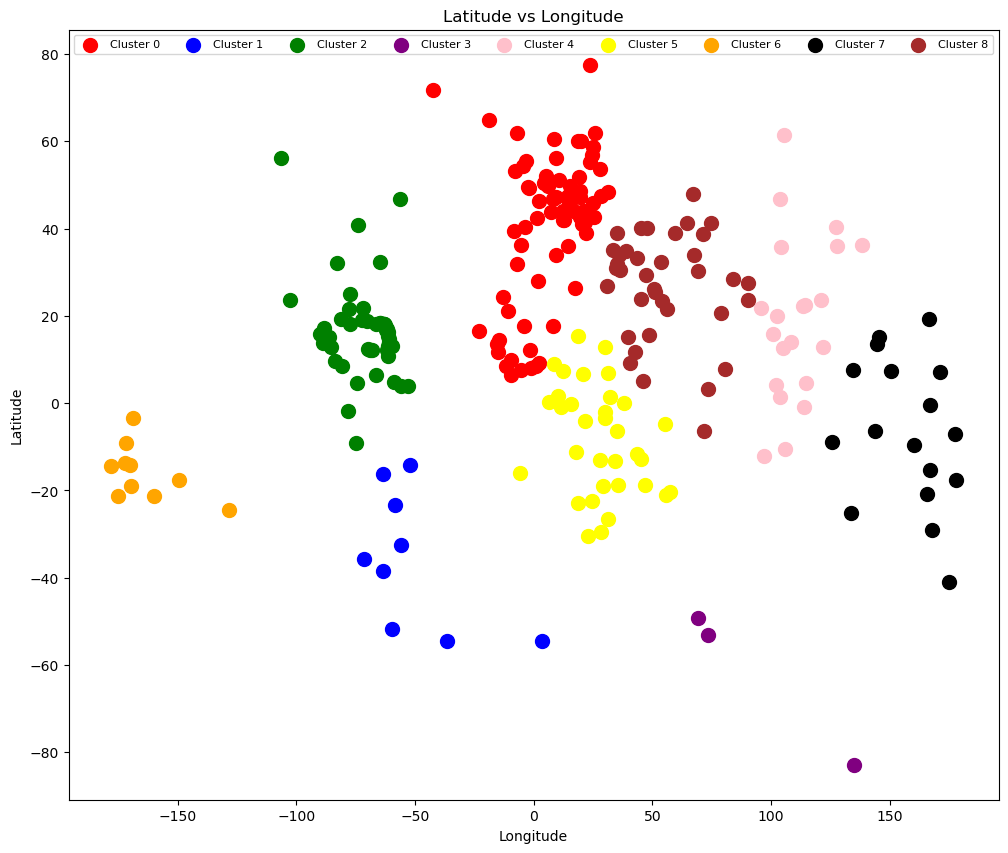

In [41]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'black', label = 'Cluster 7')

# Visualing cluster 8
cluster8 = plt.scatter(x2.iloc[y_hc == 8, 0], x2.iloc[y_hc == 8, 1], s = 100, \
                       c = 'brown', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 9,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

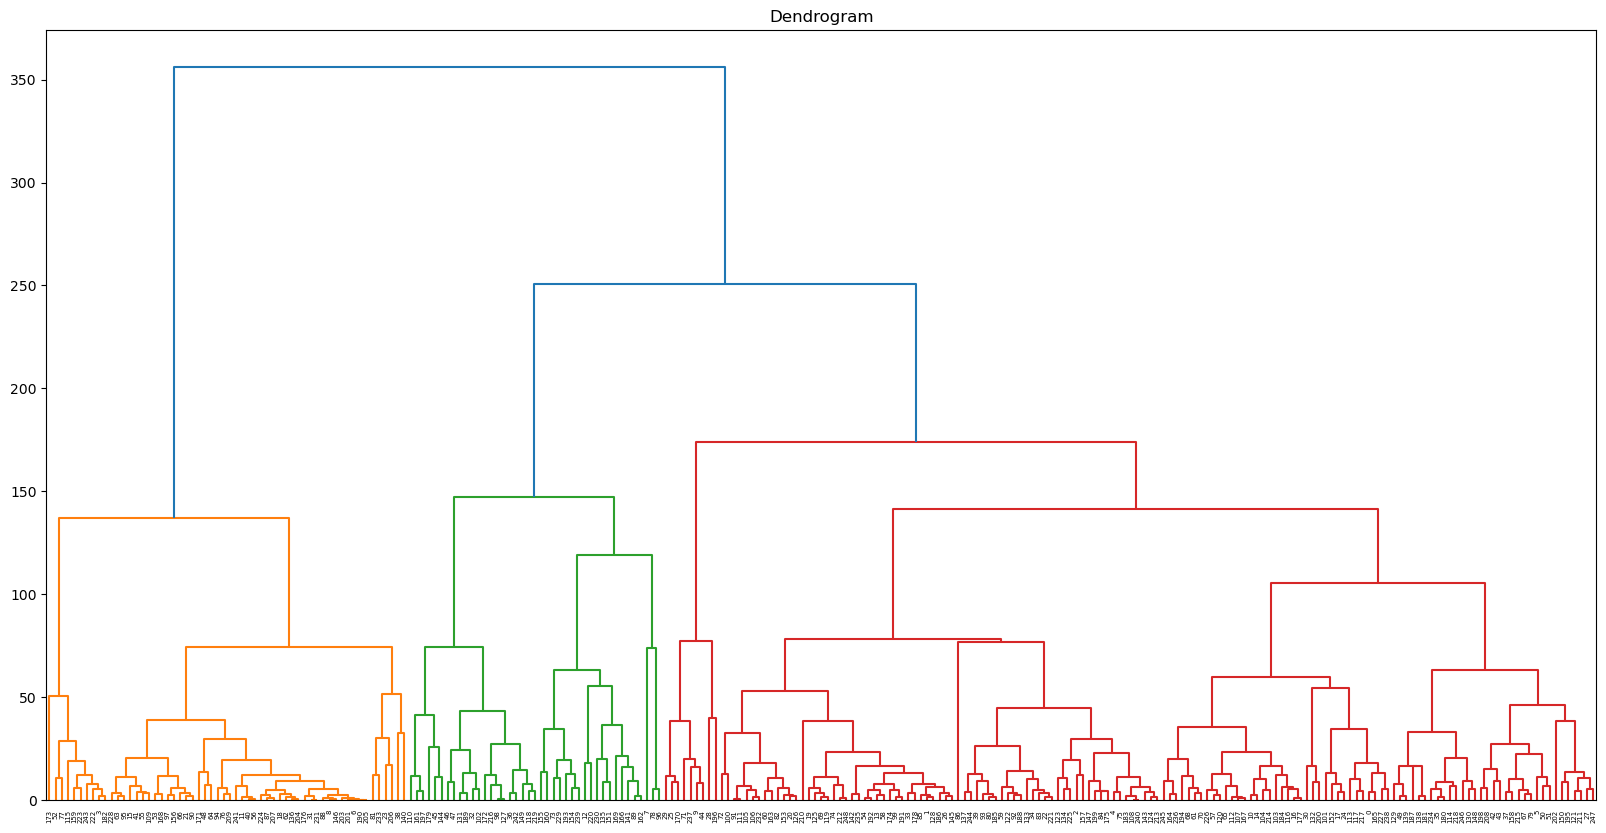

In [42]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'complete'))

# Show plot
plt.show()

#### Metric = Manhattan

In [43]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, metric = 'manhattan', linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [0 1 3 5 1 3 2 8 2 6 0 2 4 1 0 2 0 0 2 1 1 2 3 2 0 6 1 3 3 6 7 2 0 1 3 3 0
 3 2 3 2 2 3 3 6 0 0 0 2 7 3 3 5 2 1 2 2 0 1 3 1 0 2 2 2 0 2 3 0 1 0 6 1 4
 1 1 2 5 7 3 3 2 1 3 1 1 1 2 2 4 2 1 3 3 2 2 7 2 0 1 1 0 0 0 0 1 1 0 1 2 0
 1 0 0 3 5 0 0 0 1 0 3 3 0 1 1 1 0 1 7 3 0 7 3 1 4 2 3 7 7 2 4 1 1 0 1 2 1
 3 0 3 4 0 1 4 4 2 3 3 5 4 0 4 1 0 0 4 0 2 4 6 2 0 5 1 1 2 0 1 0 3 7 5 1 0
 3 1 7 3 0 2 1 1 4 0 3 6 0 3 1 0 2 3 2 2 2 1 2 3 2 1 3 1 1 0 3 0 0 3 0 4 3
 5 5 2 1 0 0 2 4 4 2 1 2 3 1 0 6 0 4 1 2 0 5 3 0 3 3 1]


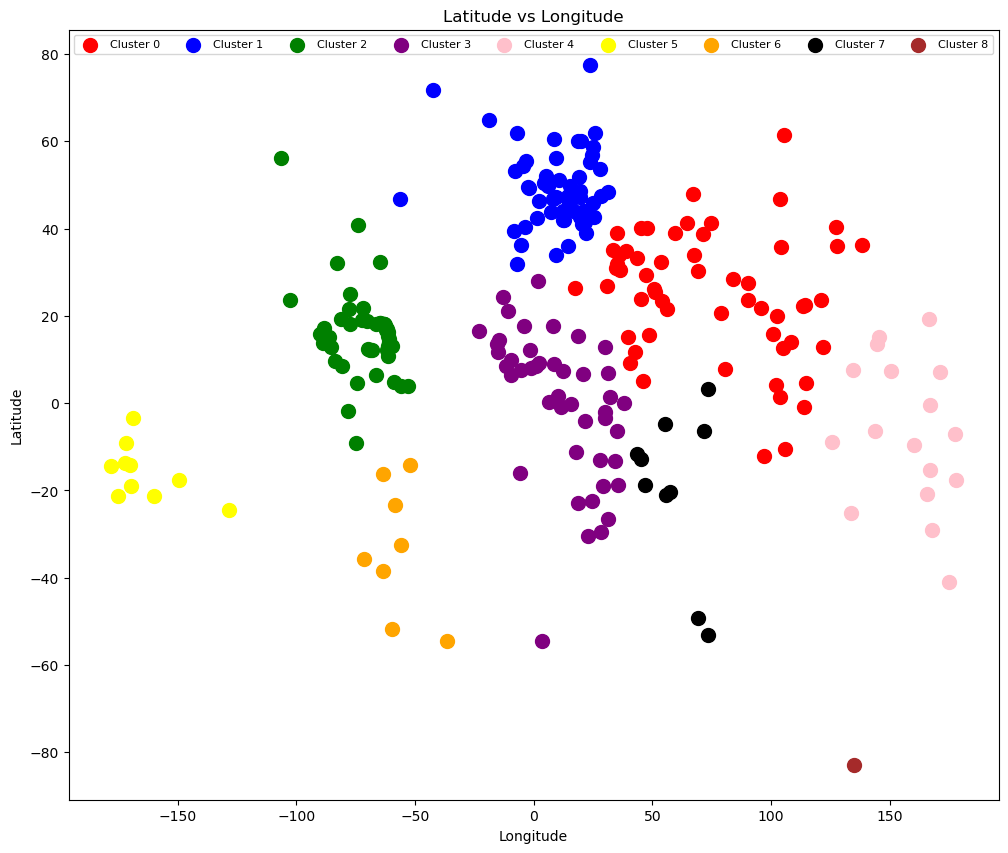

In [44]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'black', label = 'Cluster 7')

# Visualing cluster 8
cluster8 = plt.scatter(x2.iloc[y_hc == 8, 0], x2.iloc[y_hc == 8, 1], s = 100, \
                       c = 'brown', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 9,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

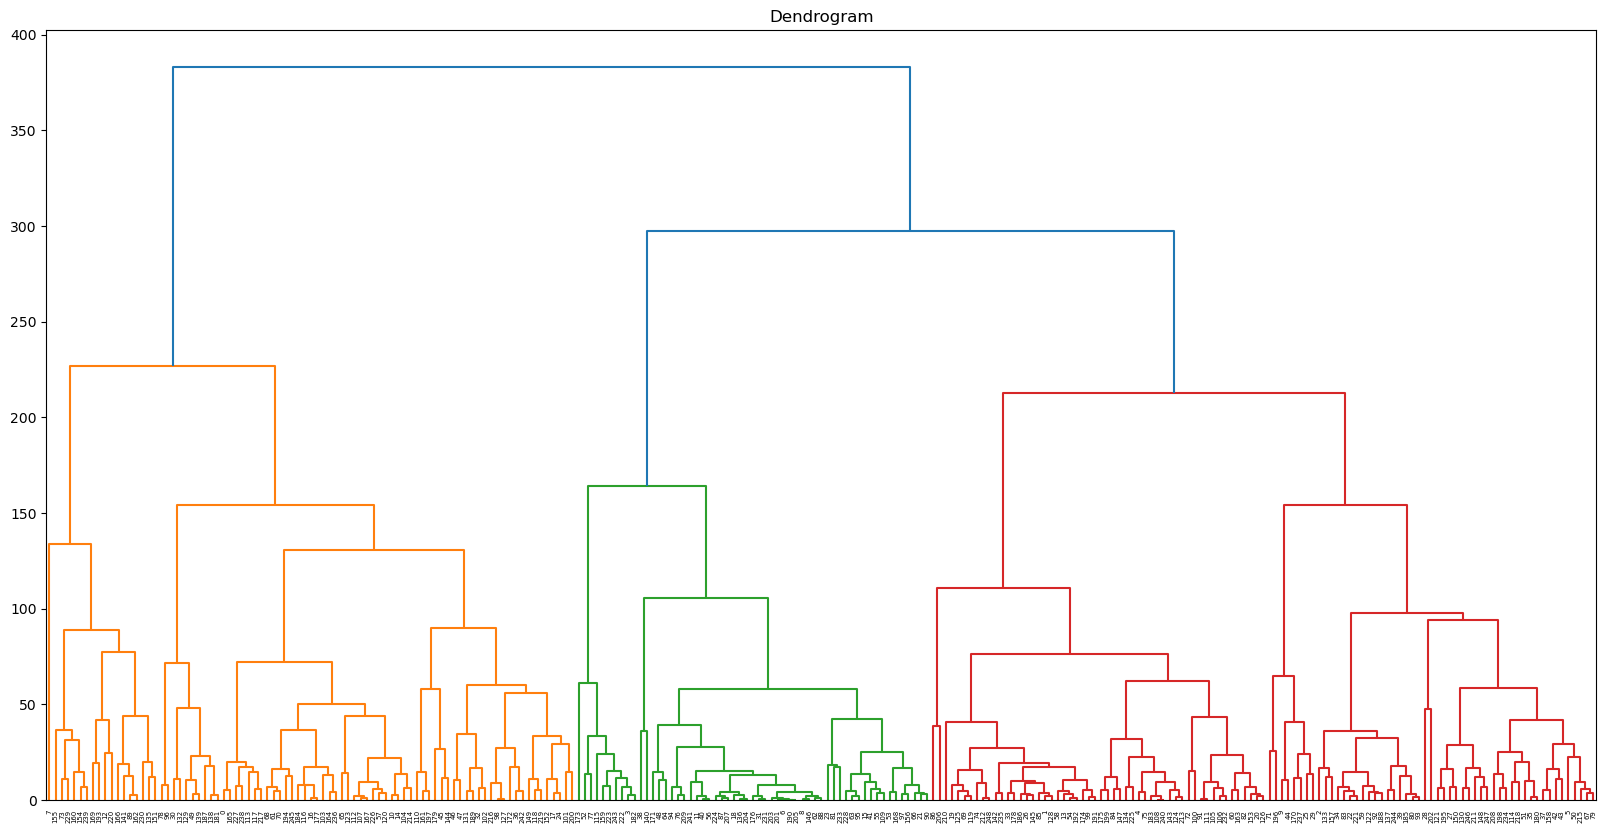

In [45]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, metric='cityblock', method = 'complete'))

# Show plot
plt.show()

#### Linkage = ward

In [46]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, metric = 'euclidean', linkage = 'ward')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [2 4 4 7 4 6 5 0 5 8 2 5 1 4 2 5 2 2 5 4 4 5 6 5 2 5 4 0 0 5 2 5 1 4 6 6 1
 6 5 6 5 5 6 6 8 1 1 1 5 0 6 6 7 5 4 5 5 2 4 6 4 2 5 5 5 2 5 6 2 4 2 8 4 3
 4 4 5 7 0 6 6 5 4 6 4 4 5 5 5 1 5 4 6 6 5 5 0 5 1 4 4 2 1 2 2 4 4 2 4 5 1
 4 2 2 6 7 2 2 1 4 2 0 6 4 4 4 4 1 4 0 0 1 2 6 4 3 5 6 0 0 5 1 4 4 1 4 5 4
 0 2 0 3 2 4 3 3 5 6 6 7 3 1 1 4 2 2 1 2 5 1 5 5 1 7 4 4 5 2 4 1 6 0 7 4 2
 6 4 0 6 1 5 4 4 3 2 0 8 1 6 4 2 5 6 5 5 5 5 5 6 5 4 0 4 4 2 6 1 2 6 1 1 6
 7 7 5 4 2 2 5 3 3 5 4 5 6 4 2 8 2 3 4 5 1 7 6 2 0 0 4]


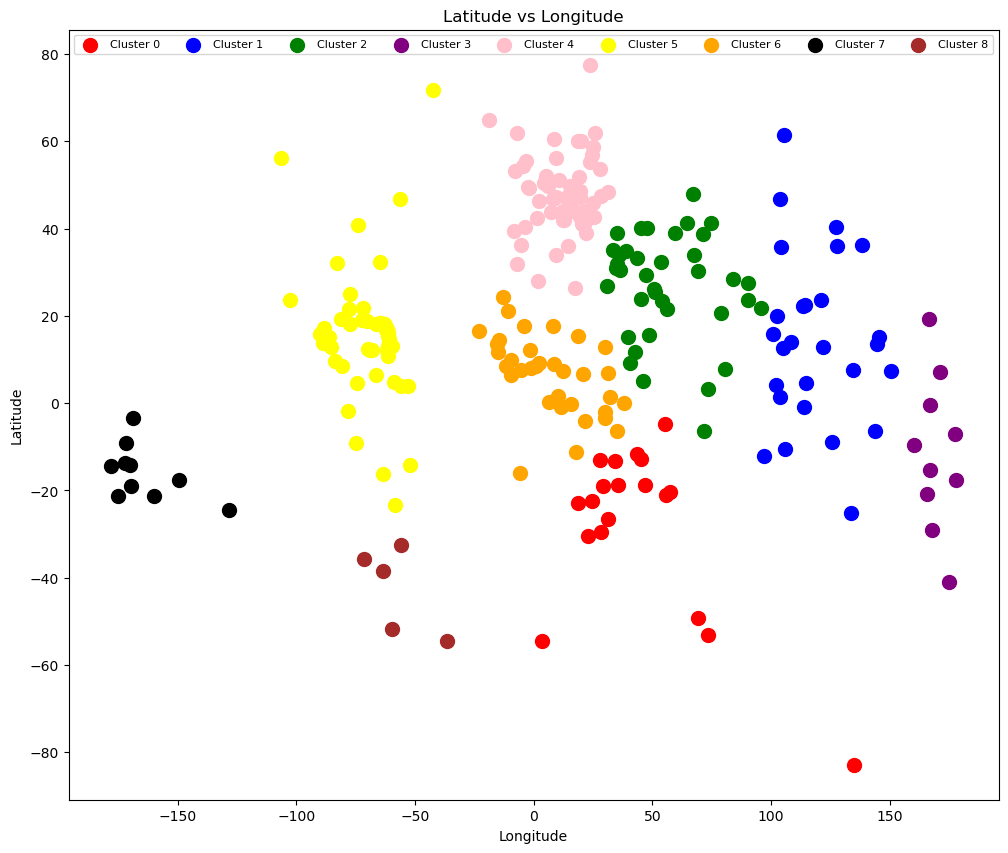

In [47]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'black', label = 'Cluster 7')

# Visualing cluster 8
cluster8 = plt.scatter(x2.iloc[y_hc == 8, 0], x2.iloc[y_hc == 8, 1], s = 100, \
                       c = 'brown', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 9,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

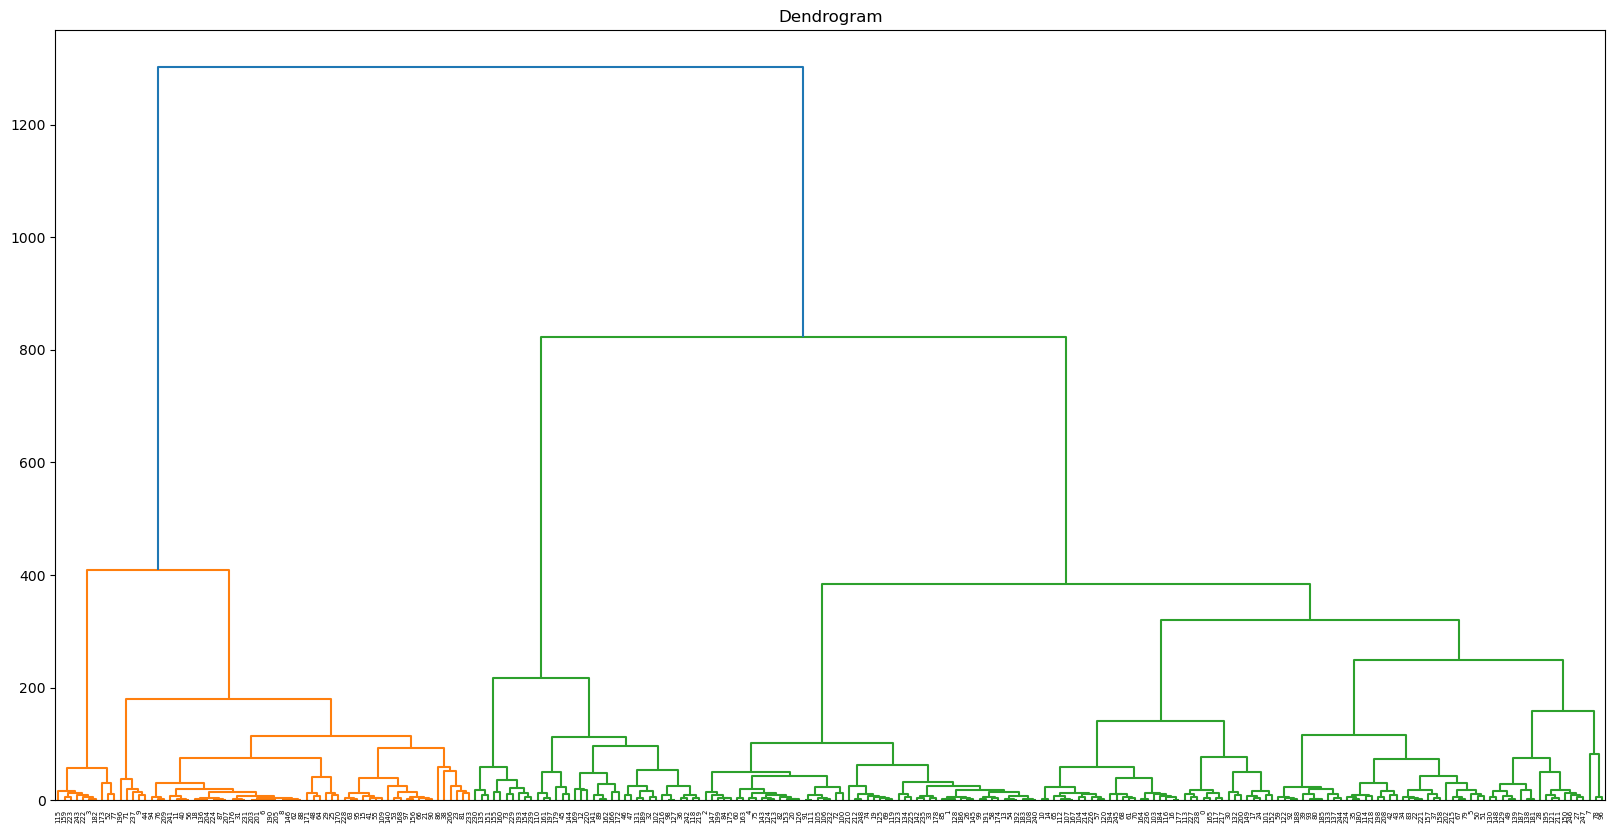

In [48]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'ward'))

# Show plot
plt.show()

#### Linkage = Single

In [49]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, metric = 'manhattan', linkage = 'single')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [1 1 1 2 1 1 0 5 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 4 0 1 0 1 1 1 1 1
 1 6 1 0 0 1 1 0 1 1 1 0 1 1 1 2 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1
 1 1 0 2 3 1 1 0 1 1 1 1 7 0 0 1 0 1 1 1 0 0 3 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 1 0 0 1 8 1 1 0 1 1 1 1 1 2 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 2 1 1 1 1 1]


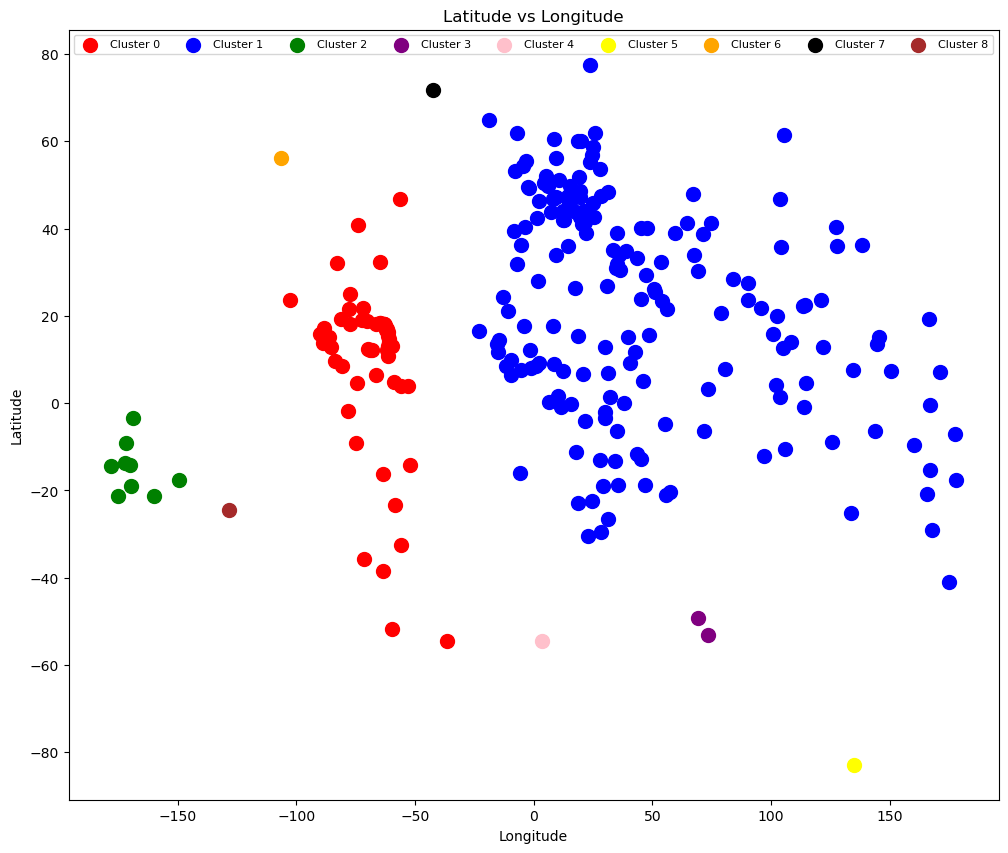

In [50]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'black', label = 'Cluster 7')

# Visualing cluster 8
cluster8 = plt.scatter(x2.iloc[y_hc == 8, 0], x2.iloc[y_hc == 8, 1], s = 100, \
                       c = 'brown', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 9,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

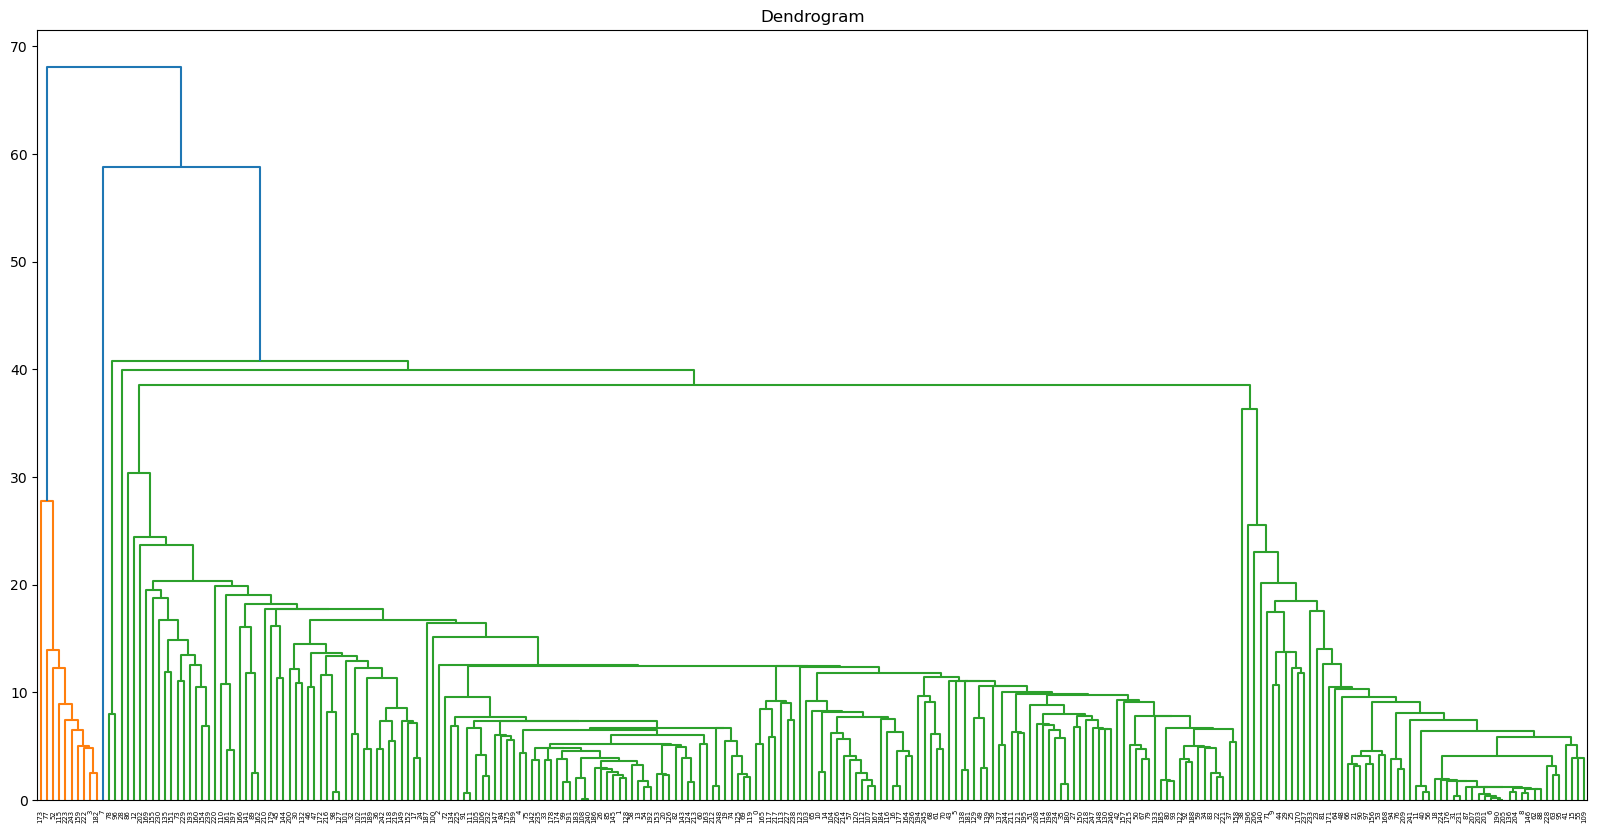

In [51]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, metric='cityblock', method = 'single'))

# Show plot
plt.show()

#### Linkage = Average

In [52]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, metric = 'manhattan', linkage = 'average')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [0 0 0 3 0 0 1 5 1 1 0 1 4 0 0 1 0 8 1 0 0 1 0 1 8 1 0 0 2 1 0 1 8 0 0 0 8
 0 1 0 1 1 0 0 1 8 8 8 1 0 0 0 3 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 4
 0 0 1 3 7 0 0 1 0 0 0 0 6 1 1 4 1 0 0 0 1 1 7 1 8 0 6 8 8 0 0 0 0 0 0 1 8
 0 0 0 0 3 0 0 8 0 0 0 0 0 0 0 0 8 0 0 0 8 0 0 0 4 1 0 0 0 1 4 0 0 8 0 1 0
 0 8 0 4 8 0 4 4 1 0 0 3 4 8 4 0 0 0 4 0 1 4 1 1 8 3 0 0 1 0 0 8 0 0 3 0 0
 0 0 0 0 8 1 0 0 4 0 0 2 8 0 0 8 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 8 0 0 8 4 0
 3 3 1 0 0 0 1 4 4 1 0 1 0 0 0 1 0 4 0 1 8 3 0 0 0 0 0]


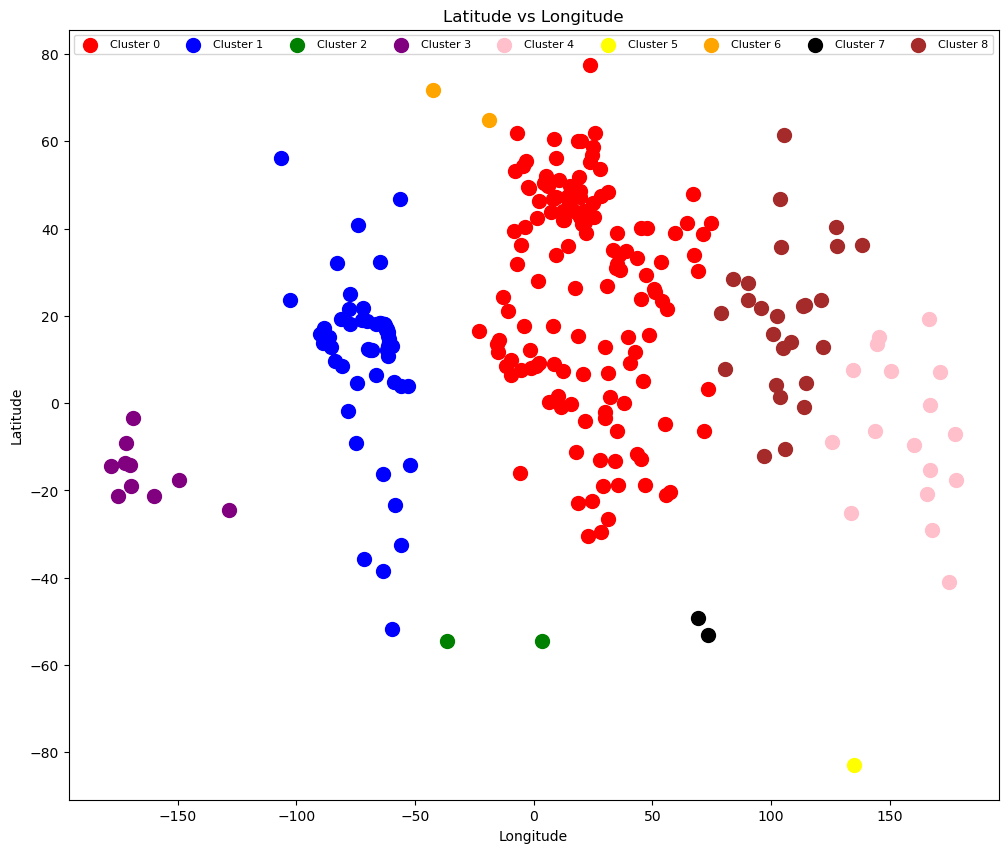

In [53]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'black', label = 'Cluster 7')

# Visualing cluster 8
cluster8 = plt.scatter(x2.iloc[y_hc == 8, 0], x2.iloc[y_hc == 8, 1], s = 100, \
                       c = 'brown', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 9,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

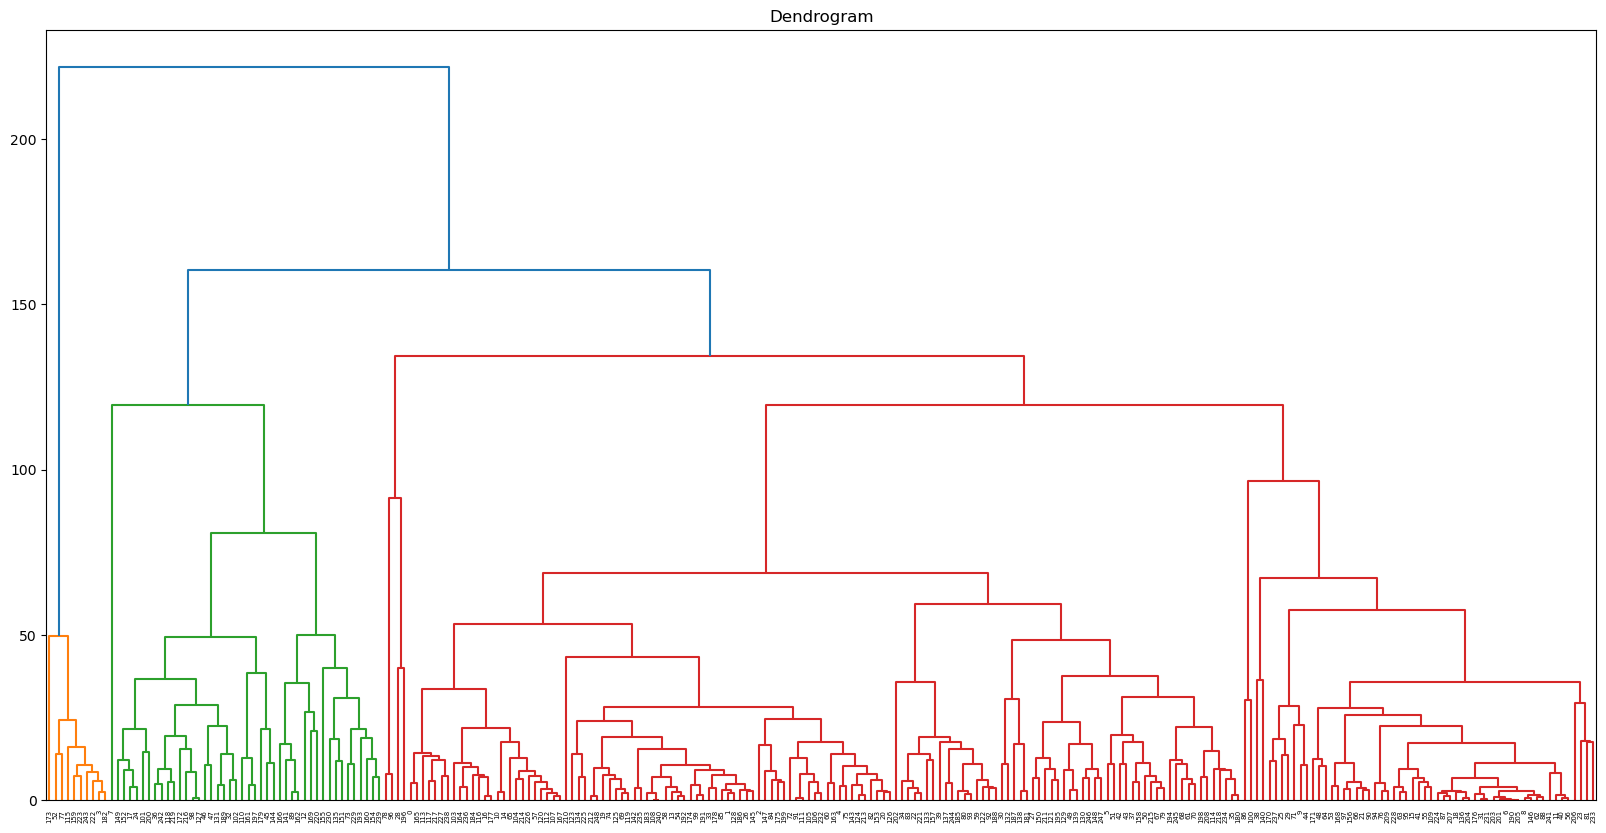

In [54]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch

# Set plot size
plt.figure(figsize = (20, 10))

# Set the plot title
plt.title("Dendrogram")

# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, metric='cityblock', method = 'average'))

# Show plot
plt.show()

### b) Name the continent each cluster represent in the table below. 

To analyze each cluster, observe the data points in each cluster on the scatter plot or look at what country names are in the clusters.

In [55]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, metric = 'manhattan', linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [0 1 3 5 1 3 2 8 2 6 0 2 4 1 0 2 0 0 2 1 1 2 3 2 0 6 1 3 3 6 7 2 0 1 3 3 0
 3 2 3 2 2 3 3 6 0 0 0 2 7 3 3 5 2 1 2 2 0 1 3 1 0 2 2 2 0 2 3 0 1 0 6 1 4
 1 1 2 5 7 3 3 2 1 3 1 1 1 2 2 4 2 1 3 3 2 2 7 2 0 1 1 0 0 0 0 1 1 0 1 2 0
 1 0 0 3 5 0 0 0 1 0 3 3 0 1 1 1 0 1 7 3 0 7 3 1 4 2 3 7 7 2 4 1 1 0 1 2 1
 3 0 3 4 0 1 4 4 2 3 3 5 4 0 4 1 0 0 4 0 2 4 6 2 0 5 1 1 2 0 1 0 3 7 5 1 0
 3 1 7 3 0 2 1 1 4 0 3 6 0 3 1 0 2 3 2 2 2 1 2 3 2 1 3 1 1 0 3 0 0 3 0 4 3
 5 5 2 1 0 0 2 4 4 2 1 2 3 1 0 6 0 4 1 2 0 5 3 0 3 3 1]


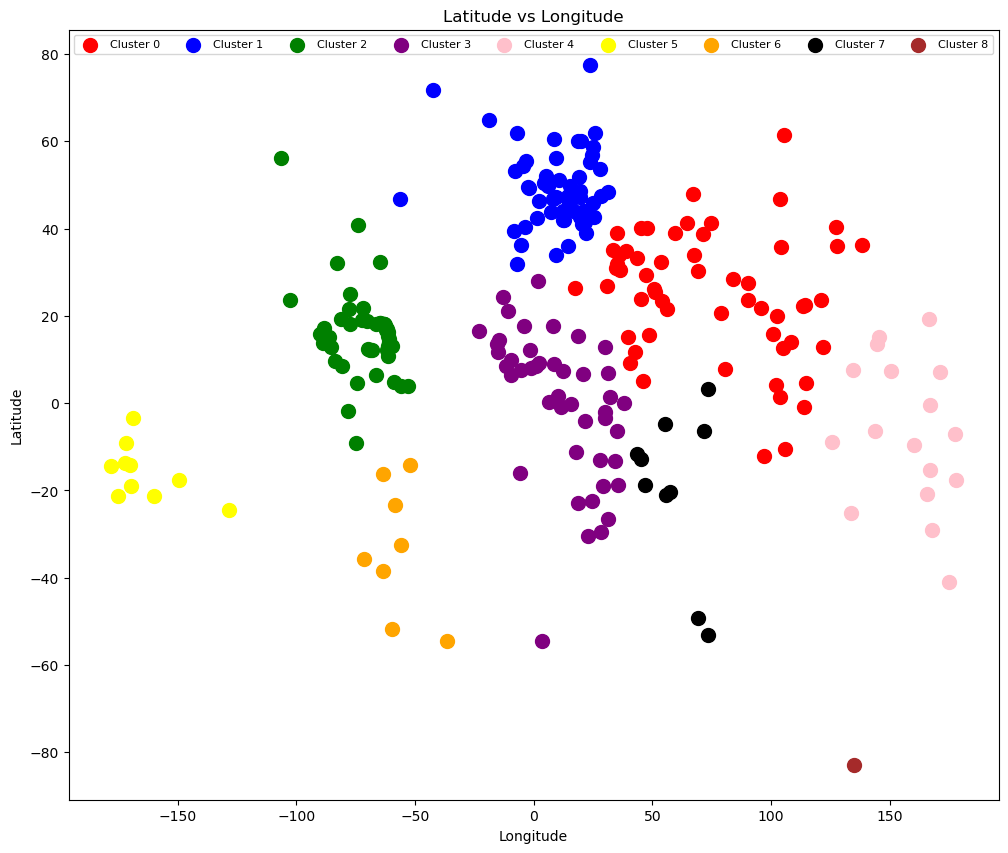

In [56]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'black', label = 'Cluster 7')

# Visualing cluster 8
cluster8 = plt.scatter(x2.iloc[y_hc == 8, 0], x2.iloc[y_hc == 8, 1], s = 100, \
                       c = 'brown', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 9,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

In [57]:
x['Cluster'] = ag.labels_
x

,latitude,longitude,country_name,Cluster
0,33.939110,67.709953,Afghanistan,0
1,41.153332,20.168331,Albania,1
2,28.033886,1.659626,Algeria,3
3,-14.270972,-170.132217,American Samoa,5
4,42.506285,1.521801,Andorra,1
...,...,...,...,...
244,24.215527,-12.885834,Western Sahara,3
245,15.552727,48.516388,Yemen,0
246,-13.133897,27.849332,Zambia,3
247,-19.015438,29.154857,Zimbabwe,3


In [58]:
# Select rows where Cluster == 0 and choose columns 'country_name' and 'Cluster' --> Asia
filtered_data = x[x['Cluster'] == 0][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Afghanistan'], ['Armenia'], ['Azerbaijan'], ['Bahrain'], ['Bangladesh'], ['Bhutan'], ['Brunei'], ['Cambodia'], ['China'], ['Christmas Island'], ['Cocos (Keeling) Islands'], ['Cyprus'], ['Djibouti'], ['Egypt'], ['Eritrea'], ['Ethiopia'], ['Hong Kong'], ['India'], ['Indonesia'], ['Iran'], ['Iraq'], ['Israel'], ['Japan'], ['Jordan'], ['Kazakhstan'], ['Kuwait'], ['Kyrgyzstan'], ['Laos'], ['Lebanon'], ['Libya'], ['Macau'], ['Malaysia'], ['Mongolia'], ['Myanmar'], ['Nepal'], ['North Korea'], ['Oman'], ['Pakistan'], ['Palestine'], ['Philippines'], ['Qatar'], ['Russia'], ['Saudi Arabia'], ['Singapore'], ['Somalia'], ['South Korea'], ['Sri Lanka'], ['Syria'], ['Taiwan'], ['Tajikistan'], ['Thailand'], ['Turkey'], ['Turkmenistan'], ['United Arab Emirates'], ['Uzbekistan'], ['Vietnam'], ['Yemen']]


In [59]:
# Select rows where Cluster == 1 and choose columns 'country_name' and 'Cluster' --> Europe
filtered_data = x[x['Cluster'] == 1][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Albania'], ['Andorra'], ['Austria'], ['Belarus'], ['Belgium'], ['Bosnia'], ['Bulgaria'], ['Croatia'], ['Czech Republic'], ['Denmark'], ['Estonia'], ['Faroe Islands'], ['Finland'], ['France'], ['Germany'], ['Gibraltar'], ['Greece'], ['Greenland'], ['Guernsey'], ['Hungary'], ['Iceland'], ['Ireland'], ['Isle of Man'], ['Italy'], ['Jersey'], ['Latvia'], ['Liechtenstein'], ['Lithuania'], ['Luxembourg'], ['Macedonia'], ['Malta'], ['Moldova'], ['Monaco'], ['Montenegro'], ['Morocco'], ['Netherlands'], ['Norway'], ['Poland'], ['Portugal'], ['Romania'], ['San Marino'], ['Serbia'], ['Slovakia'], ['Slovenia'], ['Spain'], ['St. Pierre & Miquelon'], ['Svalbard & Jan Mayen'], ['Sweden'], ['Switzerland'], ['Tunisia'], ['UK'], ['Ukraine'], ['Vatican City'], ['Aland Islands']]


In [60]:
# Select rows where Cluster == 2 and choose columns 'country_name' and 'Cluster' --> North America
filtered_data = x[x['Cluster'] == 2][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Anguilla'], ['Antigua & Barbuda'], ['Aruba'], ['Bahamas'], ['Barbados'], ['Belize'], ['Bermuda'], ['British Virgin Islands'], ['Canada'], ['Caribbean Netherlands'], ['Cayman Islands'], ['Colombia'], ['Costa Rica'], ['Cuba'], ['Curacao'], ['Dominica'], ['Dominican Republic'], ['Ecuador'], ['El Salvador'], ['French Guiana'], ['Georgia'], ['Grenada'], ['Guadeloupe'], ['Guatemala'], ['Guyana'], ['Haiti'], ['Honduras'], ['Jamaica'], ['Martinique'], ['Mexico'], ['Montserrat'], ['Nicaragua'], ['Panama'], ['Peru'], ['Puerto Rico'], ['Sint Maarten'], ['St. Barthelemy'], ['St. Kitts & Nevis'], ['St. Lucia'], ['St. Martin'], ['St. Vincent & Grenadines'], ['Suriname'], ['Trinidad & Tobago'], ['Turks & Caicos Islands'], ['U.S. Virgin Islands'], ['US'], ['Venezuela']]


In [61]:
# Select rows where Cluster == 3 and choose columns 'country_name' and 'Cluster' --> Africa
filtered_data = x[x['Cluster'] == 3][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Algeria'], ['Angola'], ['Benin'], ['Botswana'], ['Bouvet Island'], ['Burkina Faso'], ['Burundi'], ['Cameroon'], ['Cape Verde'], ['Central African Republic'], ['Chad'], ['Congo - Brazzaville'], ['Congo - Kinshasa'], ['Cote dIvoire'], ['Equatorial Guinea'], ['Gabon'], ['Gambia'], ['Ghana'], ['Guinea'], ['Guinea-Bissau'], ['Kenya'], ['Lesotho'], ['Liberia'], ['Malawi'], ['Mali'], ['Mauritania'], ['Mozambique'], ['Namibia'], ['Niger'], ['Nigeria'], ['Rwanda'], ['Senegal'], ['Sierra Leone'], ['South Africa'], ['South Sudan'], ['St. Helena'], ['Sudan'], ['Swaziland'], ['Sao Tome & Principe'], ['Tanzania'], ['Togo'], ['Uganda'], ['Western Sahara'], ['Zambia'], ['Zimbabwe']]


In [62]:
# Select rows where Cluster == 4 and choose columns 'country_name' and 'Cluster' --> Oceania
filtered_data = x[x['Cluster'] == 4][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Australia'], ['Fiji'], ['Guam'], ['Marshall Islands'], ['Micronesia'], ['Nauru'], ['New Caledonia'], ['New Zealand'], ['Norfolk Island'], ['Northern Mariana Islands'], ['Palau'], ['Papua New Guinea'], ['Solomon Islands'], ['Timor-Leste'], ['Tuvalu'], ['U.S. Outlying Islands'], ['Vanuatu']]


In [63]:
# Select rows where Cluster == 5 and choose columns 'country_name' and 'Cluster' --> Oceania
filtered_data = x[x['Cluster'] == 5][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['American Samoa'], ['Cook Islands'], ['French Polynesia'], ['Kiribati'], ['Niue'], ['Pitcairn Islands'], ['Samoa'], ['Tokelau'], ['Tonga'], ['Wallis & Futuna']]


In [64]:
# Select rows where Cluster == 6 and choose columns 'country_name' and 'Cluster' --> South America
filtered_data = x[x['Cluster'] == 6][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Argentina'], ['Bolivia'], ['Brazil'], ['Chile'], ['Falkland Islands'], ['Paraguay'], ['South Georgia & South Sandwich Islands'], ['Uruguay']]


In [65]:
# Select rows where Cluster == 7 and choose columns 'country_name' and 'Cluster' --> Africa
filtered_data = x[x['Cluster'] == 7][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['British Indian Ocean Territory'], ['Comoros'], ['French Southern Territories'], ['Heard & McDonald Islands'], ['Madagascar'], ['Maldives'], ['Mauritius'], ['Mayotte'], ['Reunion'], ['Seychelles']]


In [66]:
# Select rows where Cluster == 8 and choose columns 'country_name' and 'Cluster' --> Antartica
filtered_data = x[x['Cluster'] == 8][['country_name']]

# Convert the DataFrame to a list of lists
result_list = filtered_data.values.tolist()

print(result_list)

[['Antarctica']]


## Part 3: Identify the best continent clustering (50 marks)

In [67]:
# Import pandas library
import pandas as pd

# Read csv data file
x = pd.read_csv('countries_geocodes.csv')

x.head()

,latitude,longitude,country_name
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,-14.270972,-170.132217,American Samoa
4,42.506285,1.521801,Andorra


In [68]:
# Create a subset of the data frame containing 2 attributes
x2 = x[['longitude', 'latitude']]

x2.head()

,longitude,latitude
0,67.709953,33.939110
1,20.168331,41.153332
2,1.659626,28.033886
3,-170.132217,-14.270972
4,1.521801,42.506285


In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [70]:
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 9, metric = 'manhattan', linkage = 'complete')

ag.fit(x2)

# Print the cluster label of each data point because it does not have centroids like K-means
print("Label of each point: ", ag.labels_)

Label of each point:  [0 1 3 5 1 3 2 8 2 6 0 2 4 1 0 2 0 0 2 1 1 2 3 2 0 6 1 3 3 6 7 2 0 1 3 3 0
 3 2 3 2 2 3 3 6 0 0 0 2 7 3 3 5 2 1 2 2 0 1 3 1 0 2 2 2 0 2 3 0 1 0 6 1 4
 1 1 2 5 7 3 3 2 1 3 1 1 1 2 2 4 2 1 3 3 2 2 7 2 0 1 1 0 0 0 0 1 1 0 1 2 0
 1 0 0 3 5 0 0 0 1 0 3 3 0 1 1 1 0 1 7 3 0 7 3 1 4 2 3 7 7 2 4 1 1 0 1 2 1
 3 0 3 4 0 1 4 4 2 3 3 5 4 0 4 1 0 0 4 0 2 4 6 2 0 5 1 1 2 0 1 0 3 7 5 1 0
 3 1 7 3 0 2 1 1 4 0 3 6 0 3 1 0 2 3 2 2 2 1 2 3 2 1 3 1 1 0 3 0 0 3 0 4 3
 5 5 2 1 0 0 2 4 4 2 1 2 3 1 0 6 0 4 1 2 0 5 3 0 3 3 1]


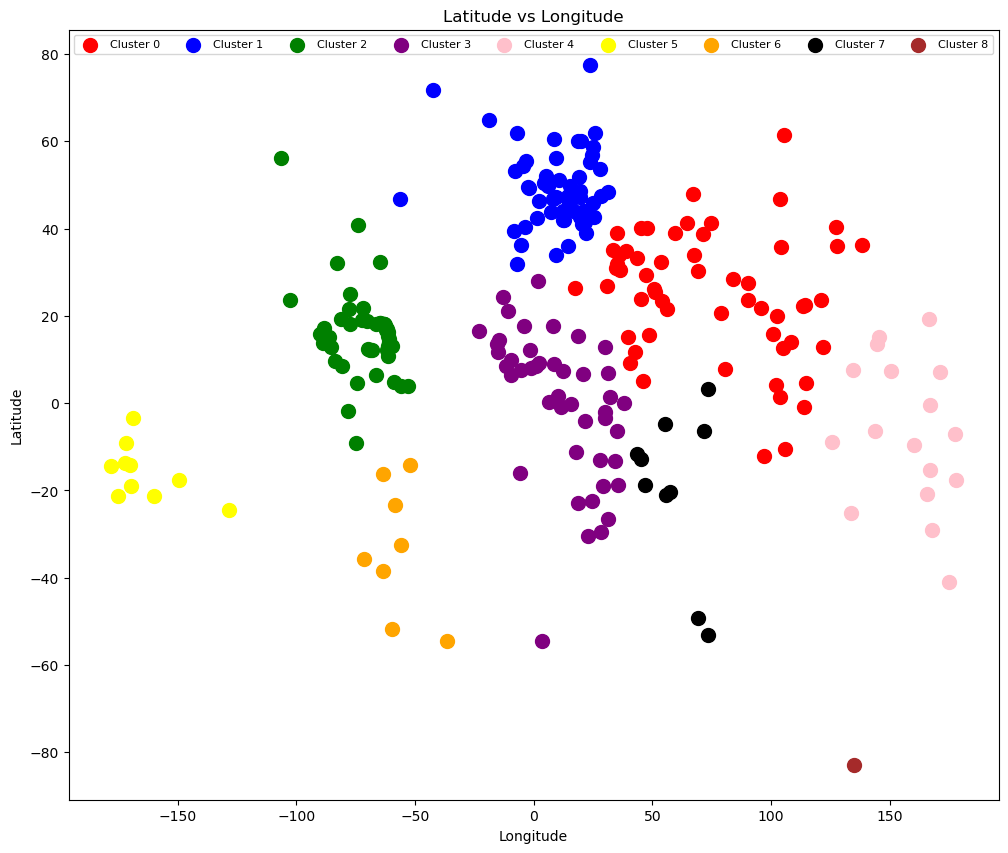

In [71]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)

y_hc

# Set plot size
plt.figure(figsize = (12,10))

# Plot the 3 clusters

# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100, \
                       c = 'red', label = 'Cluster 0')

# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, \
                       c = 'blue', label = 'Cluster 1')

# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, \
                       c = 'green', label = 'Cluster 2')

# Visualizing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100, \
                       c = 'purple', label = 'Cluster 3')

# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100, \
                       c = 'pink', label = 'Cluster 4')

# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_hc == 5, 0], x2.iloc[y_hc == 5, 1], s = 100, \
                       c = 'yellow', label = 'Cluster 5')

# Visualing cluster 6
cluster6 = plt.scatter(x2.iloc[y_hc == 6, 0], x2.iloc[y_hc == 6, 1], s = 100, \
                       c = 'orange', label = 'Cluster 6')

# Visualing cluster 7
cluster7 = plt.scatter(x2.iloc[y_hc == 7, 0], x2.iloc[y_hc == 7, 1], s = 100, \
                       c = 'black', label = 'Cluster 7')

# Visualing cluster 8
cluster8 = plt.scatter(x2.iloc[y_hc == 8, 0], x2.iloc[y_hc == 8, 1], s = 100, \
                       c = 'brown', label = 'Cluster 7')

# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8),
         ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'),
         scatterpoints = 1,
         loc = 'upper left',
         ncol = 9,
         fontsize = 8)

# Show plot title
plt.title('Latitude vs Longitude')

# Label x-axis
plt.xlabel('Longitude')

# Label y-axis
plt.ylabel('Latitude')

# Show plot
plt.show()

b) Create a new data frame to store longitude, latitude, country_name and final_cluster. The final_cluster column will contain the cluster labels from the best clusters you have selected.

In [72]:
final_cluster = pd.concat([x, pd.DataFrame(y_hc, columns =['cluster'])], axis = 1)

In [73]:
final_cluster

,latitude,longitude,country_name,cluster
0,33.939110,67.709953,Afghanistan,0
1,41.153332,20.168331,Albania,1
2,28.033886,1.659626,Algeria,3
3,-14.270972,-170.132217,American Samoa,5
4,42.506285,1.521801,Andorra,1
...,...,...,...,...
244,24.215527,-12.885834,Western Sahara,3
245,15.552727,48.516388,Yemen,0
246,-13.133897,27.849332,Zambia,3
247,-19.015438,29.154857,Zimbabwe,3


c) Save final_cluster data frame into “countries_clusters.csv”. Make sure you save your data in csv format.

In [74]:
# Save and export final_cluster data frame into csv file
# Command should be written in one line
final_cluster.to_csv(r'countries_clusters.csv', index = False, header = True)